In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.mode.chained_assignment = None
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Data Analysis

In [2]:
ds_train = pd.read_csv("we_data/train.csv")
ds_val = pd.read_csv("we_data/validation.csv")
ds_test = pd.read_csv("we_data/test.csv")

In [3]:
dataset = {
    'train': ds_train,
    'val': ds_val,
    'test': ds_test
}

In [4]:
ds_train[ds_train['click'] == 1].groupby(['payprice']).size().reset_index(name='count').sort_values('count', ascending=False).head()

,payprice,count
65,70,147
72,77,79
75,80,49
68,73,47
45,50,30


In [60]:
ds_train.shape

# Number of impressions 2430981

(2430981, 25)

In [61]:
ds_train.describe()

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.381152e+06,0.0,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,2.109685e+00,NaN,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,8.764370e-01,NaN,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,1.000000e+00,NaN,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,2.000000e+00,NaN,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,3.000000e+00,NaN,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,4.000000e+00,NaN,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [270]:
avg_ctr = ds_train.click.mean() # 0.0007375623
(1 - avg_ctr ) * 100
# avgSlotPrice: 26.71783
# avgPayPrice: 78.15142

99.9262437674338

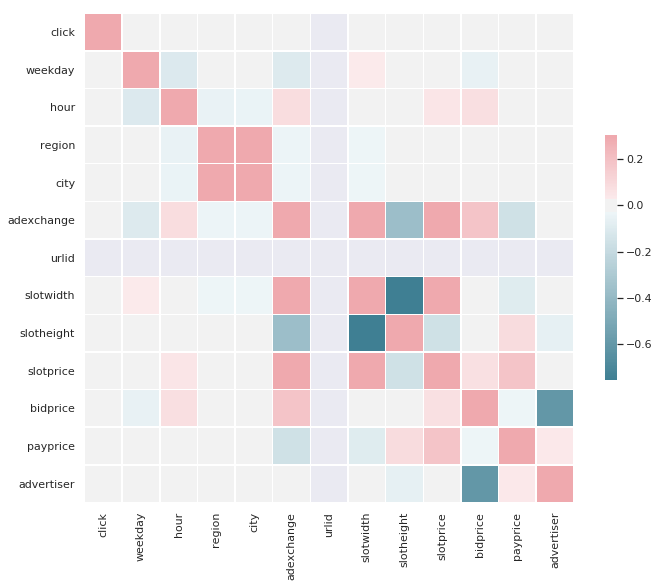

In [63]:
pearson = ds_train.corr(method='pearson')
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pearson, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Useful fields
# 'weekday', 'hour', 'region', 'city', 'slotwidth', 'slotheight', 'slotprice', 'advertiser'

In [64]:
ds_train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [65]:
for col in ds_train.columns:
    print(f'[{col}]')
    for name, df in dataset.items():
        if col in df:
            print(f'{name}: {len(df[col].unique())}')
        else: 
            print(f'{name}: N.A')
    print('')

# Useful fields here: 
# 1. adexchange
# 2. usertag

[click]
train: 2
val: 2
test: N.A

[weekday]
train: 7
val: 7
test: 7

[hour]
train: 24
val: 24
test: 24

[bidid]
train: 2430981
val: 303925
test: 303375

[userid]
train: 2342677
val: 302416
test: 301846

[useragent]
train: 38
val: 35
test: 33

[IP]
train: 503975
val: 194693
test: 194482

[region]
train: 35
val: 35
test: 35

[city]
train: 370
val: 370
test: 370

[adexchange]
train: 5
val: 5
test: 5

[domain]
train: 23013
val: 9290
test: 9239

[url]
train: 763961
val: 136905
test: 136738

[urlid]
train: 1
val: 1
test: 1

[slotid]
train: 52283
val: 15720
test: 15745

[slotwidth]
train: 21
val: 21
test: 21

[slotheight]
train: 14
val: 14
test: 14

[slotvisibility]
train: 11
val: 11
test: 11

[slotformat]
train: 4
val: 4
test: 4

[slotprice]
train: 286
val: 267
test: 258

[creative]
train: 131
val: 129
test: 129

[bidprice]
train: 8
val: 8
test: N.A

[payprice]
train: 301
val: 301
test: N.A

[keypage]
train: 19
val: 19
test: 19

[advertiser]
train: 9
val: 9
test: 9

[usertag]
train: 744036


In [66]:
field = 'advertiser'
ds_train.groupby(field)[[field, 'click']].sum()

,advertiser,click
advertiser,,
1458,717850674,385
2259,301967307,43
2261,248985842,36
2821,596263486,131
2997,149337513,217
3358,889722248,202
3386,1540768826,320
3427,1380416162,272
3476,1080462460,187


In [67]:
for name, df in dataset.items():
    tags = set()
    for x in df['usertag']:
        tags.update(str(x).split(','))
    print(f'{name}: {len(tags)}')

train: 69
val: 69
test: 69


In [68]:
# Fix useful null fields (no_necessary since we get_dummies for all of them)
# ds_train.fillna(0, inplace=True)
ds_train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [69]:
print(f'All: Lowest payprice: {ds_train.payprice.min()}, Highest payprice: {ds_train.payprice.max()}')
print(f'Click Only: Lowest payprice: {ds_train[ds_train["click"] == 1].payprice.min()}, '
      f'Highest payprice: {ds_train[ds_train["click"] == 1].payprice.max()}')

All: Lowest payprice: 0, Highest payprice: 300
Click Only: Lowest payprice: 4, Highest payprice: 300


# Functions

In [146]:
def preprocess(data):
    """Preprocess data"""
    
    df = data.copy()
    
#     Bin slot price
    bins = [-np.inf, 10, 50, 100, 150, np.inf]
    labels = ['sp_1','sp_2','sp_3','sp_4', 'sp_5']
    df['slotprice'] = pd.cut(df['slotprice'], bins=bins, labels=labels)
    
    # Obtain os and browser from useragent
    os_bow = df['useragent'].str.split('_', n=1, expand=True)
    df['os'] = os_bow[0] 
    df['browser'] = os_bow[1]
    df.drop('useragent', axis=1, inplace=True)
    
    # Keep selected fields
    selected_fields = ['weekday', 'hour', 'region', 'city', 'adexchange', 'slotwidth', 'slotheight', 
                   'slotvisibility', 'slotformat' ,'slotprice', 'keypage', 'advertiser', 'usertag', 
                   'os', 'browser']
    
    if 'click' in df:
        selected_fields.append('click')

    df = df[selected_fields]
    
    # Perform One Hot Encoding for categorical fields
    cat_cols = ['weekday', 'hour', 'region', 'city', 'adexchange', 'slotwidth', 'slotheight', 'slotvisibility',
              'slotformat', 'keypage', 'advertiser', 'os', 'browser', 'slotprice']
    
    df = pd.get_dummies(df, columns=cat_cols)
    
    # Perform One Hot Encoding for 'usertag' field
    df_users = df['usertag'].str.get_dummies(sep=',')
    df.drop('usertag', axis=1, inplace=True)
    df = pd.concat([df, df_users], axis=1)
    
    return df

In [6]:
def downsample(df, rate, random_state):
    """Downsample data based on rate"""
    if 'click' in df:
        df_click_0 = df[df['click'] == 0]
        df_click_1 = df[df['click'] == 1]
        df_click_0_undersample = df_click_0.sample(frac=rate, random_state=random_state)
        df = pd.concat([df_click_0_undersample, df_click_1], axis=0)
    else:
        df = df.sample(frac=rate)
    
    return df

In [7]:
def get_est_ctr(model, df, downsample_rate):
    """Apply classifier model on dataset given a downsampling rate"""
    bidids = df['bidid']
    if 'click' in df.columns:
        df = df.drop('click', axis=1)
    processed_df = preprocess(df)
    prob = pd.DataFrame(model.predict_proba(processed_df))
    prob['cctr'] = (prob[1] / (prob[1] + ((1 - prob[1]) / downsample_rate))) # calibrated ctr 
    return pd.concat([bidids, prob['cctr']], axis=1)

In [21]:
def check_clicks(df_val, df_bids, budget=6250):
    """Check performance of a single agent with winning criterion 1"""
    clicks, imps, budget = -1, -1, budget
    df = df_val[['bidid', 'payprice', 'click']]
    df = pd.merge(df, df_bids, on='bidid')
    df['win'] = (df['bidprice'] - df['payprice']) >= 0
    
    win_df = df[df['win'] == True]
    win_df['payprice'] = win_df['payprice'] / 1000
    
    win_df['expense'] = win_df['payprice'].cumsum()

    win_in_budget = win_df[win_df['expense'] < budget]
     
    used = win_in_budget['expense'].iloc[-1]
    imps = len(win_in_budget['expense'])
    clicks = win_in_budget['click'].sum()            
    
    return {'clicks': clicks, 'imps': imps, 'spent': used}

In [100]:
def simulate_auction(val_df, player_bids, budget=6250):
    """Simulates a full auction with the winning criterion 2"""
    auction_info = val_df[['click', 'bidid', 'payprice']].set_index('bidid').to_dict()
    players = {}
    in_play = set()
    results = {}
    
    # Load all player bids
    for name, player_df in player_bids:
        player_df['bidprice'] = pd.to_numeric(player_df['bidprice'])
        players[name] = player_df[['bidid', 'bidprice']].set_index('bidid').to_dict()
        players[name]['stat'] = {
            'cost': 0.0,
            'click': 0,
            'imps': 0,
            'out_round': 0
        }
        in_play.add(name)
        
    
    # Run through all items in auction
    # Assume player have bids for all items
    for i, (bidid, payprice) in enumerate(auction_info['payprice'].items(), start=1):
        click = auction_info['click'][bidid]
        bids = []
        payment = 0
        
        # Gather player bids
        for player in in_play:
            p_bid = players[player]['bidprice'][bidid]
            if p_bid >= payprice:
                bids.append((player, p_bid))
        
        # Check who won
        bids = sorted(bids, reverse=True, key=lambda a : a[1])
        if not bids:
            continue
        if len(bids) == 1:
            payment = (payprice) / 1000
        elif len(bids) > 1:
            payment = (payprice + bids[1][1]) / 1000
        
        # Update winner
        winner = bids[0][0]
        players[winner]['stat']['cost'] += payment
        players[winner]['stat']['click'] += click
        players[winner]['stat']['imps'] += 1
 
        if players[winner]['stat']['cost'] >= budget:
            players[winner]['stat']['out_round'] = i
            in_play.remove(winner)
    
    for player in players:
        results[player] = players[player]['stat']
    
    return results

In [11]:
def show_result(results, limit=10):
    """Helper funtion to print results"""
    for name, stats in sorted(results.items(), key=lambda x: (x[1]['clicks'], x[1]['imps']), reverse=True)[:limit]:
        print(f"{name}: clicks: {stats['clicks']}, imps: {stats['imps']}, spent: {stats['spent']:.2f}, "
              f"ctr: {stats['clicks']/stats['imps']:.5f}, "
              f"cpm: {stats['spent']/stats['imps']:.5f}, cpc: {stats['spent']/stats['clicks']:.5f}")

## Bidding Strategy Functions

In [82]:
def const(kpi, value):
    return value

In [84]:
def rand(kpi, lower, upper):
    return np.random.randint(lower, upper+1)

In [50]:
def linear(kpi, avg_kpi, base_bid):
    return base_bid * kpi / avg_kpi

In [53]:
def ortb1(kpi, l, c):
    x = c / l * kpi + pow(c, 2)
    return pow(x, 0.5) - c

In [54]:
def ortb2(kpi, l, c):
    x1 = kpi + pow(pow(c, 2) * pow(l, 2) + pow(kpi, 2), 0.5)
    x2 = c * l
    return c * ( pow(x1/x2, 1/3) - pow(x2/x1, 1/3) )

# Constant Bidding (Criterion 1)

In [15]:
results = {}
for i in range (50, 120, 1):
    const_df = ds_val[['bidid', 'bidprice']]
    const_df['bidprice'] = i
    result = check_clicks(ds_val, const_df)
    results[f'constant_{i}'] = result
    results[f'constant_{i}']['bidvalue'] = i

In [16]:
show_result(results)
# Best constant bidding results (77, 79 and 78) 

constant_77: clicks: 68, imps: 146864, spent: 6249.99, ctr: 0.00046, cpm: 0.04256, cpc: 91.91165
constant_79: clicks: 68, imps: 145916, spent: 6249.96, ctr: 0.00047, cpm: 0.04283, cpc: 91.91113
constant_78: clicks: 67, imps: 146311, spent: 6249.99, ctr: 0.00046, cpm: 0.04272, cpc: 93.28348
constant_81: clicks: 67, imps: 139927, spent: 6249.97, ctr: 0.00048, cpm: 0.04467, cpc: 93.28316
constant_89: clicks: 67, imps: 131020, spent: 6249.95, ctr: 0.00051, cpm: 0.04770, cpc: 93.28290
constant_80: clicks: 66, imps: 140549, spent: 6249.97, ctr: 0.00047, cpm: 0.04447, cpc: 94.69655
constant_82: clicks: 66, imps: 139484, spent: 6249.96, ctr: 0.00047, cpm: 0.04481, cpc: 94.69635
constant_83: clicks: 66, imps: 138993, spent: 6249.97, ctr: 0.00047, cpm: 0.04497, cpc: 94.69658
constant_84: clicks: 66, imps: 136862, spent: 6249.96, ctr: 0.00048, cpm: 0.04567, cpc: 94.69638
constant_85: clicks: 66, imps: 136112, spent: 6249.93, ctr: 0.00048, cpm: 0.04592, cpc: 94.69592


In [17]:
const_bid_df = pd.DataFrame.from_dict(results, orient='index', dtype='float').set_index('bidvalue')

In [18]:
const_bid_df.head()

,clicks,imps,spent
bidvalue,,,
100.0,62.0,125767.0,6249.951
101.0,61.0,124497.0,6249.985
102.0,61.0,124203.0,6249.991
103.0,61.0,123768.0,6249.990
104.0,60.0,123540.0,6249.937


In [19]:
const_bid_df[const_bid_df['spent'] < 6249].sort_values('bidvalue')

,clicks,imps,spent
bidvalue,,,
50.0,43.0,115493.0,3146.517
51.0,46.0,117911.0,3269.835
52.0,48.0,123022.0,3535.607
53.0,48.0,124073.0,3591.310
54.0,48.0,125005.0,3641.638
55.0,49.0,132801.0,4070.418
56.0,49.0,134226.0,4150.218
57.0,49.0,135553.0,4225.857
58.0,49.0,136840.0,4300.503


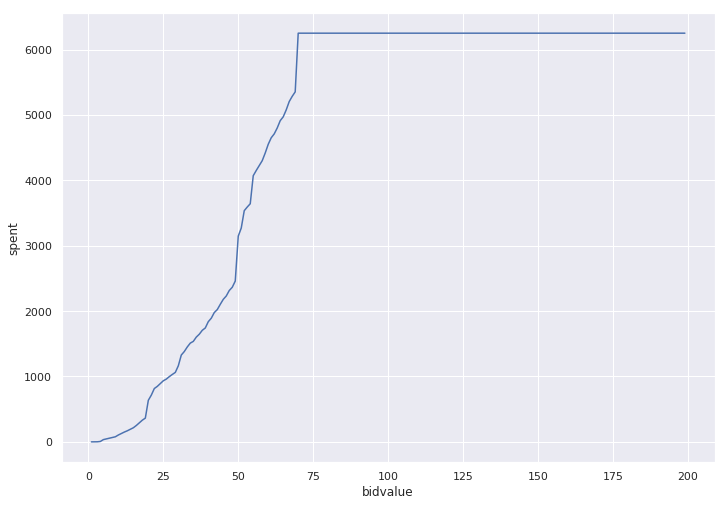

In [250]:
sns.lineplot(x=const_bid_df.index, y='spent', data=const_bid_df)

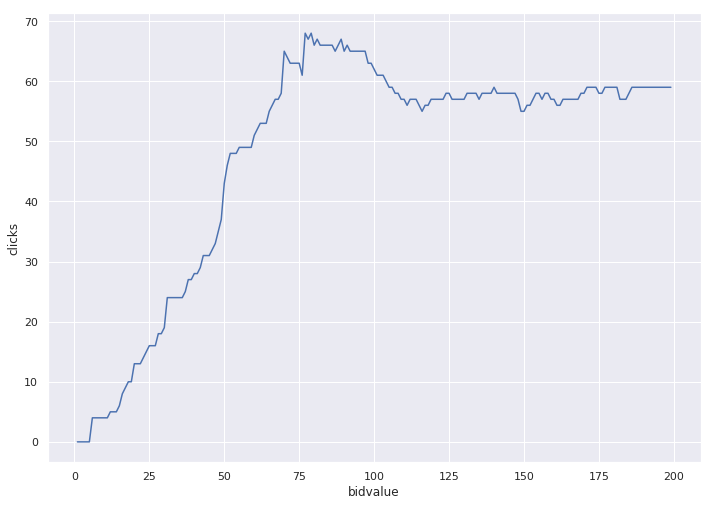

In [29]:
sns.lineplot(x=const_bid_df.index, y='clicks', data=const_bid_df)

# Random Bidding (criterion 1)

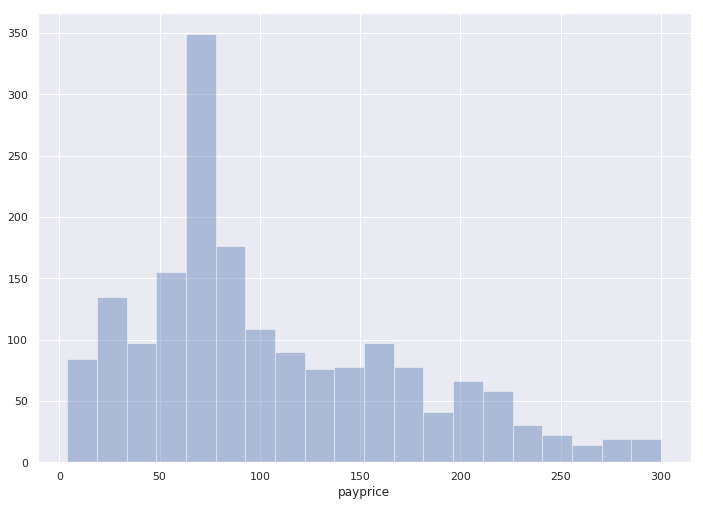

In [197]:
x = sns.distplot(ds_train[ds_train['click'] == 1].payprice, hist=True, kde=False)
figure = x.get_figure()
figure.savefig('dist.eps', format='eps')

In [200]:
import random
# payprice range, click payprice range, +-5 around constant, +- 10 around constant, +- 20 around constant
# random_72-82_5: clicks: 68, imps: 149525, spent: 6249.97, ctr: 0.00045, cpm: 0.04180, cpc: 91.91129
# random_72-82_3: clicks: 67, imps: 149549, spent: 6249.97, ctr: 0.00045, cpm: 0.04179, cpc: 93.28318

random_ranges = [(1,75), (50, 100), (75, 150), (1, 100)]
results = {}

for x, y in random_ranges:
    for i in range (10):
        rand_df = ds_val[['bidid', 'bidprice']]
        rand_df['bidprice'] = np.random.randint(x, y, size=(len(ds_val), 1))
        result = check_clicks(ds_val, rand_df)
        results[f'random_{x}-{y}_{i}'] = result
        results[f'random_{x}-{y}_{i}']['range'] = f'{x} to {y}'

In [201]:
show_result(results)

random_50-100_5: clicks: 74, imps: 151917, spent: 6249.99, ctr: 0.00049, cpm: 0.04114, cpc: 84.45931
random_50-100_2: clicks: 73, imps: 151828, spent: 6249.97, ctr: 0.00048, cpm: 0.04116, cpc: 85.61599
random_50-100_1: clicks: 70, imps: 151582, spent: 6250.00, ctr: 0.00046, cpm: 0.04123, cpc: 89.28567
random_50-100_0: clicks: 69, imps: 151786, spent: 6249.94, ctr: 0.00045, cpm: 0.04118, cpc: 90.57890
random_50-100_7: clicks: 69, imps: 151645, spent: 6249.99, ctr: 0.00046, cpm: 0.04121, cpc: 90.57954
random_50-100_9: clicks: 67, imps: 151571, spent: 6249.97, ctr: 0.00044, cpm: 0.04123, cpc: 93.28316
random_50-100_4: clicks: 66, imps: 151864, spent: 6249.98, ctr: 0.00043, cpm: 0.04116, cpc: 94.69665
random_50-100_8: clicks: 64, imps: 151881, spent: 6249.98, ctr: 0.00042, cpm: 0.04115, cpc: 97.65592
random_50-100_3: clicks: 63, imps: 151938, spent: 6249.98, ctr: 0.00041, cpm: 0.04114, cpc: 99.20603
random_50-100_6: clicks: 61, imps: 151601, spent: 6249.97, ctr: 0.00040, cpm: 0.04123, cpc:

In [202]:
rand_bid_df = pd.DataFrame.from_dict(results, orient='index')

In [203]:
rand_bid_df = rand_bid_df.groupby(['range']).mean()

In [204]:
rand_bid_df['ctr'] = rand_bid_df['clicks'] / rand_bid_df['imps']
rand_bid_df['cpc'] = rand_bid_df['spent'] / rand_bid_df['clicks']
rand_bid_df['cpm'] = rand_bid_df['spent'] / rand_bid_df['imps']
rand_bid_df.sort_values('clicks', ascending=False)

,clicks,imps,spent,ctr,cpc,cpm
range,,,,,,
50 to 100,67.6,151761.3,6249.9769,0.000445,92.455280,0.041183
75 to 150,57.7,120793.7,6249.9688,0.000478,108.318350,0.051741
1 to 100,47.9,116589.2,4192.3898,0.000411,87.523795,0.035959
1 to 75,29.9,84554.8,2296.6711,0.000354,76.811742,0.027162


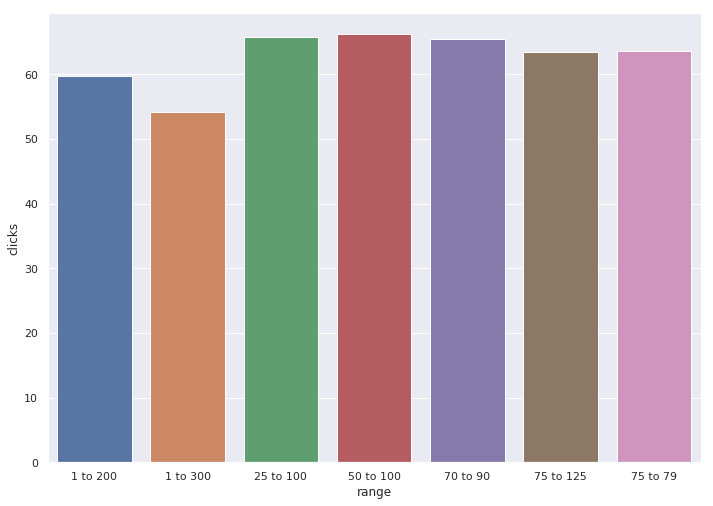

In [99]:
sns.barplot(x=rand_bid_df.index, y='clicks', data=rand_bid_df)

# Random Bidding Criterion 2

In [40]:
#  (150,200), (250, 300), (301, 350)
rand_ranges = [(300,310)]
player_numbers = [100]

results = {}
players = []
for lower, upper in rand_ranges:
    for num_p in player_numbers: 
        for i in range(num_p):
            rand_df = ds_val[['bidid', 'bidprice']]
            rand_df['bidprice'] = np.random.randint(lower, upper, size=(len(ds_val), 1))
            players.append((str(i), rand_df))
result = pd.DataFrame.from_dict(simulate_auction(ds_val, players), orient='index')

In [417]:
# Range 50 to 100
rand_50_50_100 = {'50_bids_50-100-35.csv': {'clicks': 1, 'imps': 2688, 'ctr': 0.0003720238095238095, 'cpc': 393.506, 'cost': 393.506, 'out_round': 0}, '50_bids_50-100-47.csv': {'clicks': 2, 'imps': 2756, 'ctr': 0.000725689404934688, 'cpc': 202.56050000000064, 'cost': 405.1210000000013, 'out_round': 0}, '50_bids_50-100-33.csv': {'clicks': 7, 'imps': 4594, 'ctr': 0.0015237265999129299, 'cpc': 96.22414285714312, 'cost': 673.5690000000019, 'out_round': 0}, '50_bids_50-100-18.csv': {'clicks': 1, 'imps': 3335, 'ctr': 0.0002998500749625187, 'cpc': 489.34299999999956, 'cost': 489.34299999999956, 'out_round': 0}, '50_bids_50-100-10.csv': {'clicks': 1, 'imps': 3585, 'ctr': 0.0002789400278940028, 'cpc': 526.2710000000011, 'cost': 526.2710000000011, 'out_round': 0}, '50_bids_50-100-48.csv': {'clicks': 2, 'imps': 3270, 'ctr': 0.0006116207951070336, 'cpc': 240.67499999999976, 'cost': 481.3499999999995, 'out_round': 0}, '50_bids_50-100-12.csv': {'clicks': 6, 'imps': 4901, 'ctr': 0.001224239951030402, 'cpc': 120.2951666666671, 'cost': 721.7710000000026, 'out_round': 0}, '50_bids_50-100-22.csv': {'clicks': 6, 'imps': 6514, 'ctr': 0.00092109303039607, 'cpc': 159.61283333333475, 'cost': 957.6770000000085, 'out_round': 0}, '50_bids_50-100-30.csv': {'clicks': 2, 'imps': 4110, 'ctr': 0.00048661800486618007, 'cpc': 301.7825000000007, 'cost': 603.5650000000014, 'out_round': 0}, '50_bids_50-100-43.csv': {'clicks': 2, 'imps': 7337, 'ctr': 0.0002725909772386534, 'cpc': 538.0139999999992, 'cost': 1076.0279999999984, 'out_round': 0}, '50_bids_50-100-24.csv': {'clicks': 3, 'imps': 5726, 'ctr': 0.0005239259517988125, 'cpc': 279.7500000000016, 'cost': 839.2500000000048, 'out_round': 0}, '50_bids_50-100-31.csv': {'clicks': 2, 'imps': 3725, 'ctr': 0.0005369127516778523, 'cpc': 273.07000000000045, 'cost': 546.1400000000009, 'out_round': 0}, '50_bids_50-100-15.csv': {'clicks': 2, 'imps': 4122, 'ctr': 0.00048520135856380397, 'cpc': 302.97850000000005, 'cost': 605.9570000000001, 'out_round': 0}, '50_bids_50-100-36.csv': {'clicks': 5, 'imps': 4444, 'ctr': 0.0011251125112511251, 'cpc': 131.00980000000027, 'cost': 655.0490000000013, 'out_round': 0}, '50_bids_50-100-27.csv': {'clicks': 5, 'imps': 5656, 'ctr': 0.000884016973125884, 'cpc': 166.4000000000006, 'cost': 832.000000000003, 'out_round': 0}, '50_bids_50-100-14.csv': {'clicks': 1, 'imps': 5406, 'ctr': 0.0001849796522382538, 'cpc': 792.6570000000046, 'cost': 792.6570000000046, 'out_round': 0}, '50_bids_50-100-1.csv': {'clicks': 2, 'imps': 5777, 'ctr': 0.00034620045006058506, 'cpc': 425.23350000000175, 'cost': 850.4670000000035, 'out_round': 0}, '50_bids_50-100-5.csv': {'clicks': 4, 'imps': 2866, 'ctr': 0.0013956734124214933, 'cpc': 104.72649999999989, 'cost': 418.90599999999955, 'out_round': 0}, '50_bids_50-100-19.csv': {'clicks': 5, 'imps': 6924, 'ctr': 0.0007221259387637204, 'cpc': 203.60480000000118, 'cost': 1018.0240000000059, 'out_round': 0}, '50_bids_50-100-28.csv': {'clicks': 2, 'imps': 4000, 'ctr': 0.0005, 'cpc': 292.2065000000009, 'cost': 584.4130000000018, 'out_round': 0}, '50_bids_50-100-13.csv': {'clicks': 2, 'imps': 6912, 'ctr': 0.00028935185185185184, 'cpc': 506.60850000000215, 'cost': 1013.2170000000043, 'out_round': 0}, '50_bids_50-100-29.csv': {'clicks': 4, 'imps': 3578, 'ctr': 0.0011179429849077697, 'cpc': 131.0357500000001, 'cost': 524.1430000000004, 'out_round': 0}, '50_bids_50-100-6.csv': {'clicks': 3, 'imps': 5522, 'ctr': 0.0005432814197754436, 'cpc': 270.11866666666805, 'cost': 810.3560000000042, 'out_round': 0}, '50_bids_50-100-26.csv': {'clicks': 5, 'imps': 6285, 'ctr': 0.0007955449482895784, 'cpc': 184.8050000000009, 'cost': 924.0250000000044, 'out_round': 0}, '50_bids_50-100-25.csv': {'clicks': 1, 'imps': 3001, 'ctr': 0.0003332222592469177, 'cpc': 439.7199999999995, 'cost': 439.7199999999995, 'out_round': 0}, '50_bids_50-100-34.csv': {'clicks': 5, 'imps': 5255, 'ctr': 0.0009514747859181732, 'cpc': 154.38520000000133, 'cost': 771.9260000000066, 'out_round': 0}, '50_bids_50-100-2.csv': {'clicks': 3, 'imps': 4721, 'ctr': 0.0006354585892819318, 'cpc': 230.82200000000137, 'cost': 692.4660000000041, 'out_round': 0}, '50_bids_50-100-45.csv': {'clicks': 1, 'imps': 4659, 'ctr': 0.000214638334406525, 'cpc': 684.9970000000025, 'cost': 684.9970000000025, 'out_round': 0}, '50_bids_50-100-7.csv': {'clicks': 4, 'imps': 6025, 'ctr': 0.0006639004149377593, 'cpc': 221.6145000000012, 'cost': 886.4580000000047, 'out_round': 0}, '50_bids_50-100-44.csv': {'clicks': 3, 'imps': 4002, 'ctr': 0.0007496251874062968, 'cpc': 195.5160000000017, 'cost': 586.5480000000051, 'out_round': 0}, '50_bids_50-100-21.csv': {'clicks': 5, 'imps': 5092, 'ctr': 0.0009819324430479183, 'cpc': 149.62040000000067, 'cost': 748.1020000000034, 'out_round': 0}, '50_bids_50-100-38.csv': {'clicks': 2, 'imps': 4876, 'ctr': 0.00041017227235438887, 'cpc': 358.3130000000011, 'cost': 716.6260000000023, 'out_round': 0}, '50_bids_50-100-17.csv': {'clicks': 2, 'imps': 2852, 'ctr': 0.0007012622720897616, 'cpc': 209.32050000000018, 'cost': 418.64100000000036, 'out_round': 0}, '50_bids_50-100-9.csv': {'clicks': 0, 'imps': 3597, 'ctr': 0.0, 'cpc': 99999, 'cost': 527.1640000000008, 'out_round': 0}, '50_bids_50-100-11.csv': {'clicks': 5, 'imps': 6657, 'ctr': 0.0007510890791647889, 'cpc': 196.0844000000015, 'cost': 980.4220000000075, 'out_round': 0}, '50_bids_50-100-16.csv': {'clicks': 1, 'imps': 2994, 'ctr': 0.00033400133600534405, 'cpc': 438.4739999999999, 'cost': 438.4739999999999, 'out_round': 0}, '50_bids_50-100-41.csv': {'clicks': 1, 'imps': 3036, 'ctr': 0.00032938076416337287, 'cpc': 442.63599999999985, 'cost': 442.63599999999985, 'out_round': 0}, '50_bids_50-100-39.csv': {'clicks': 1, 'imps': 2644, 'ctr': 0.00037821482602118004, 'cpc': 388.76000000000056, 'cost': 388.76000000000056, 'out_round': 0}, '50_bids_50-100-23.csv': {'clicks': 1, 'imps': 4073, 'ctr': 0.00024551927326295114, 'cpc': 595.6770000000015, 'cost': 595.6770000000015, 'out_round': 0}, '50_bids_50-100-40.csv': {'clicks': 2, 'imps': 3164, 'ctr': 0.0006321112515802782, 'cpc': 231.14000000000007, 'cost': 462.28000000000014, 'out_round': 0}, '50_bids_50-100-42.csv': {'clicks': 1, 'imps': 3401, 'ctr': 0.00029403116730373417, 'cpc': 498.44100000000054, 'cost': 498.44100000000054, 'out_round': 0}, '50_bids_50-100-0.csv': {'clicks': 0, 'imps': 5119, 'ctr': 0.0, 'cpc': 99999, 'cost': 750.9380000000061, 'out_round': 0}, '50_bids_50-100-46.csv': {'clicks': 2, 'imps': 3887, 'ctr': 0.0005145356315924878, 'cpc': 284.7934999999995, 'cost': 569.586999999999, 'out_round': 0}, '50_bids_50-100-37.csv': {'clicks': 1, 'imps': 2942, 'ctr': 0.0003399048266485384, 'cpc': 430.2650000000006, 'cost': 430.2650000000006, 'out_round': 0}, '50_bids_50-100-49.csv': {'clicks': 1, 'imps': 3609, 'ctr': 0.0002770850651149903, 'cpc': 528.960000000001, 'cost': 528.960000000001, 'out_round': 0}, '50_bids_50-100-4.csv': {'clicks': 2, 'imps': 4418, 'ctr': 0.0004526935264825713, 'cpc': 324.3020000000008, 'cost': 648.6040000000016, 'out_round': 0}, '50_bids_50-100-8.csv': {'clicks': 3, 'imps': 6053, 'ctr': 0.0004956220056170494, 'cpc': 295.9453333333352, 'cost': 887.8360000000056, 'out_round': 0}, '50_bids_50-100-3.csv': {'clicks': 1, 'imps': 6997, 'ctr': 0.00014291839359725596, 'cpc': 1029.7360000000053, 'cost': 1029.7360000000053, 'out_round': 0}, '50_bids_50-100-20.csv': {'clicks': 3, 'imps': 6296, 'ctr': 0.0004764930114358323, 'cpc': 308.8660000000021, 'cost': 926.5980000000062, 'out_round': 0}, '50_bids_50-100-32.csv': {'clicks': 0, 'imps': 4277, 'ctr': 0.0, 'cpc': 99999, 'cost': 629.0600000000026, 'out_round': 0}}
rand_75_50_100 = {'75_bids_50-100-72.csv': {'clicks': 0, 'imps': 2509, 'ctr': 0.0, 'cpc': 99999, 'cost': 367.57699999999994, 'out_round': 0}, '75_bids_50-100-39.csv': {'clicks': 0, 'imps': 4406, 'ctr': 0.0, 'cpc': 99999, 'cost': 649.0890000000019, 'out_round': 0}, '75_bids_50-100-13.csv': {'clicks': 0, 'imps': 1756, 'ctr': 0.0, 'cpc': 99999, 'cost': 257.56400000000014, 'out_round': 0}, '75_bids_50-100-32.csv': {'clicks': 5, 'imps': 4810, 'ctr': 0.0010395010395010396, 'cpc': 142.25740000000113, 'cost': 711.2870000000056, 'out_round': 0}, '75_bids_50-100-49.csv': {'clicks': 1, 'imps': 1461, 'ctr': 0.0006844626967830253, 'cpc': 215.258, 'cost': 215.258, 'out_round': 0}, '75_bids_50-100-36.csv': {'clicks': 4, 'imps': 2299, 'ctr': 0.0017398869073510222, 'cpc': 84.48475000000025, 'cost': 337.939000000001, 'out_round': 0}, '75_bids_50-100-44.csv': {'clicks': 5, 'imps': 4351, 'ctr': 0.0011491611123879567, 'cpc': 128.53920000000062, 'cost': 642.6960000000031, 'out_round': 0}, '75_bids_50-100-34.csv': {'clicks': 4, 'imps': 5689, 'ctr': 0.0007031112673580594, 'cpc': 210.09625000000156, 'cost': 840.3850000000062, 'out_round': 0}, '75_bids_50-100-22.csv': {'clicks': 3, 'imps': 3428, 'ctr': 0.0008751458576429405, 'cpc': 169.03366666666713, 'cost': 507.1010000000014, 'out_round': 0}, '75_bids_50-100-56.csv': {'clicks': 3, 'imps': 2312, 'ctr': 0.0012975778546712802, 'cpc': 113.5273333333334, 'cost': 340.5820000000002, 'out_round': 0}, '75_bids_50-100-5.csv': {'clicks': 2, 'imps': 3860, 'ctr': 0.0005181347150259067, 'cpc': 286.57300000000055, 'cost': 573.1460000000011, 'out_round': 0}, '75_bids_50-100-29.csv': {'clicks': 2, 'imps': 3098, 'ctr': 0.0006455777921239509, 'cpc': 227.74400000000003, 'cost': 455.48800000000006, 'out_round': 0}, '75_bids_50-100-16.csv': {'clicks': 1, 'imps': 2093, 'ctr': 0.00047778308647873863, 'cpc': 307.9060000000004, 'cost': 307.9060000000004, 'out_round': 0}, '75_bids_50-100-66.csv': {'clicks': 1, 'imps': 1393, 'ctr': 0.0007178750897343862, 'cpc': 205.60200000000023, 'cost': 205.60200000000023, 'out_round': 0}, '75_bids_50-100-30.csv': {'clicks': 1, 'imps': 2451, 'ctr': 0.0004079967360261118, 'cpc': 359.94000000000057, 'cost': 359.94000000000057, 'out_round': 0}, '75_bids_50-100-65.csv': {'clicks': 0, 'imps': 2057, 'ctr': 0.0, 'cpc': 99999, 'cost': 301.6260000000006, 'out_round': 0}, '75_bids_50-100-11.csv': {'clicks': 1, 'imps': 2443, 'ctr': 0.00040933278755628325, 'cpc': 360.6969999999997, 'cost': 360.6969999999997, 'out_round': 0}, '75_bids_50-100-17.csv': {'clicks': 2, 'imps': 4386, 'ctr': 0.00045599635202918376, 'cpc': 323.6670000000012, 'cost': 647.3340000000024, 'out_round': 0}, '75_bids_50-100-42.csv': {'clicks': 3, 'imps': 2549, 'ctr': 0.0011769321302471558, 'cpc': 125.30800000000004, 'cost': 375.9240000000001, 'out_round': 0}, '75_bids_50-100-19.csv': {'clicks': 0, 'imps': 2113, 'ctr': 0.0, 'cpc': 99999, 'cost': 311.10700000000065, 'out_round': 0}, '75_bids_50-100-35.csv': {'clicks': 1, 'imps': 2774, 'ctr': 0.0003604902667627974, 'cpc': 409.29200000000003, 'cost': 409.29200000000003, 'out_round': 0}, '75_bids_50-100-38.csv': {'clicks': 1, 'imps': 2192, 'ctr': 0.0004562043795620438, 'cpc': 322.55500000000046, 'cost': 322.55500000000046, 'out_round': 0}, '75_bids_50-100-25.csv': {'clicks': 3, 'imps': 4633, 'ctr': 0.0006475285991797971, 'cpc': 228.6556666666671, 'cost': 685.9670000000012, 'out_round': 0}, '75_bids_50-100-62.csv': {'clicks': 1, 'imps': 4361, 'ctr': 0.00022930520522815867, 'cpc': 641.7780000000012, 'cost': 641.7780000000012, 'out_round': 0}, '75_bids_50-100-28.csv': {'clicks': 2, 'imps': 5689, 'ctr': 0.0003515556336790297, 'cpc': 422.570000000002, 'cost': 845.140000000004, 'out_round': 0}, '75_bids_50-100-1.csv': {'clicks': 2, 'imps': 5193, 'ctr': 0.00038513383400731754, 'cpc': 384.51150000000155, 'cost': 769.0230000000031, 'out_round': 0}, '75_bids_50-100-3.csv': {'clicks': 1, 'imps': 1676, 'ctr': 0.0005966587112171838, 'cpc': 246.44100000000032, 'cost': 246.44100000000032, 'out_round': 0}, '75_bids_50-100-61.csv': {'clicks': 0, 'imps': 1646, 'ctr': 0.0, 'cpc': 99999, 'cost': 240.48699999999982, 'out_round': 0}, '75_bids_50-100-20.csv': {'clicks': 0, 'imps': 1380, 'ctr': 0.0, 'cpc': 99999, 'cost': 202.30899999999986, 'out_round': 0}, '75_bids_50-100-41.csv': {'clicks': 4, 'imps': 4977, 'ctr': 0.0008036970062286518, 'cpc': 184.21975000000108, 'cost': 736.8790000000043, 'out_round': 0}, '75_bids_50-100-47.csv': {'clicks': 1, 'imps': 1863, 'ctr': 0.0005367686527106817, 'cpc': 273.561, 'cost': 273.561, 'out_round': 0}, '75_bids_50-100-23.csv': {'clicks': 2, 'imps': 3299, 'ctr': 0.0006062443164595332, 'cpc': 243.19450000000046, 'cost': 486.3890000000009, 'out_round': 0}, '75_bids_50-100-54.csv': {'clicks': 3, 'imps': 4151, 'ctr': 0.0007227174174897615, 'cpc': 203.66700000000026, 'cost': 611.0010000000008, 'out_round': 0}, '75_bids_50-100-14.csv': {'clicks': 2, 'imps': 5519, 'ctr': 0.0003623844899438304, 'cpc': 408.27300000000196, 'cost': 816.5460000000039, 'out_round': 0}, '75_bids_50-100-27.csv': {'clicks': 2, 'imps': 2995, 'ctr': 0.000667779632721202, 'cpc': 219.60799999999983, 'cost': 439.21599999999967, 'out_round': 0}, '75_bids_50-100-45.csv': {'clicks': 0, 'imps': 1420, 'ctr': 0.0, 'cpc': 99999, 'cost': 209.3540000000004, 'out_round': 0}, '75_bids_50-100-26.csv': {'clicks': 0, 'imps': 1660, 'ctr': 0.0, 'cpc': 99999, 'cost': 243.92999999999998, 'out_round': 0}, '75_bids_50-100-7.csv': {'clicks': 4, 'imps': 4613, 'ctr': 0.0008671146759158899, 'cpc': 170.0532500000005, 'cost': 680.213000000002, 'out_round': 0}, '75_bids_50-100-15.csv': {'clicks': 1, 'imps': 1329, 'ctr': 0.0007524454477050414, 'cpc': 195.14900000000023, 'cost': 195.14900000000023, 'out_round': 0}, '75_bids_50-100-48.csv': {'clicks': 1, 'imps': 3496, 'ctr': 0.0002860411899313501, 'cpc': 516.2070000000003, 'cost': 516.2070000000003, 'out_round': 0}, '75_bids_50-100-63.csv': {'clicks': 0, 'imps': 1573, 'ctr': 0.0, 'cpc': 99999, 'cost': 230.41000000000025, 'out_round': 0}, '75_bids_50-100-24.csv': {'clicks': 1, 'imps': 1889, 'ctr': 0.0005293806246691371, 'cpc': 277.33200000000056, 'cost': 277.33200000000056, 'out_round': 0}, '75_bids_50-100-0.csv': {'clicks': 3, 'imps': 3057, 'ctr': 0.0009813542688910696, 'cpc': 149.33266666666702, 'cost': 447.99800000000107, 'out_round': 0}, '75_bids_50-100-73.csv': {'clicks': 4, 'imps': 5769, 'ctr': 0.0006933610677760444, 'cpc': 213.6887500000018, 'cost': 854.7550000000072, 'out_round': 0}, '75_bids_50-100-18.csv': {'clicks': 0, 'imps': 1568, 'ctr': 0.0, 'cpc': 99999, 'cost': 231.6379999999999, 'out_round': 0}, '75_bids_50-100-67.csv': {'clicks': 1, 'imps': 1616, 'ctr': 0.0006188118811881188, 'cpc': 238.66400000000027, 'cost': 238.66400000000027, 'out_round': 0}, '75_bids_50-100-59.csv': {'clicks': 2, 'imps': 2615, 'ctr': 0.0007648183556405354, 'cpc': 192.89450000000042, 'cost': 385.78900000000084, 'out_round': 0}, '75_bids_50-100-31.csv': {'clicks': 2, 'imps': 2633, 'ctr': 0.0007595898214963919, 'cpc': 194.77650000000008, 'cost': 389.55300000000017, 'out_round': 0}, '75_bids_50-100-58.csv': {'clicks': 3, 'imps': 3917, 'ctr': 0.0007658922644881287, 'cpc': 192.52933333333394, 'cost': 577.5880000000018, 'out_round': 0}, '75_bids_50-100-50.csv': {'clicks': 2, 'imps': 5340, 'ctr': 0.0003745318352059925, 'cpc': 393.42800000000165, 'cost': 786.8560000000033, 'out_round': 0}, '75_bids_50-100-51.csv': {'clicks': 2, 'imps': 2939, 'ctr': 0.0006805035726437564, 'cpc': 216.862, 'cost': 433.724, 'out_round': 0}, '75_bids_50-100-4.csv': {'clicks': 0, 'imps': 1408, 'ctr': 0.0, 'cpc': 99999, 'cost': 206.67500000000032, 'out_round': 0}, '75_bids_50-100-21.csv': {'clicks': 2, 'imps': 4138, 'ctr': 0.0004833252779120348, 'cpc': 306.7150000000009, 'cost': 613.4300000000018, 'out_round': 0}, '75_bids_50-100-37.csv': {'clicks': 0, 'imps': 2564, 'ctr': 0.0, 'cpc': 99999, 'cost': 376.560000000001, 'out_round': 0}, '75_bids_50-100-55.csv': {'clicks': 4, 'imps': 5404, 'ctr': 0.0007401924500370096, 'cpc': 199.09175000000153, 'cost': 796.3670000000061, 'out_round': 0}, '75_bids_50-100-74.csv': {'clicks': 0, 'imps': 1953, 'ctr': 0.0, 'cpc': 99999, 'cost': 288.7680000000002, 'out_round': 0}, '75_bids_50-100-40.csv': {'clicks': 2, 'imps': 3595, 'ctr': 0.0005563282336578582, 'cpc': 264.23450000000093, 'cost': 528.4690000000019, 'out_round': 0}, '75_bids_50-100-57.csv': {'clicks': 0, 'imps': 1340, 'ctr': 0.0, 'cpc': 99999, 'cost': 197.50599999999977, 'out_round': 0}, '75_bids_50-100-71.csv': {'clicks': 2, 'imps': 3839, 'ctr': 0.0005209690023443605, 'cpc': 282.97099999999995, 'cost': 565.9419999999999, 'out_round': 0}, '75_bids_50-100-10.csv': {'clicks': 1, 'imps': 3348, 'ctr': 0.0002986857825567503, 'cpc': 492.00199999999995, 'cost': 492.00199999999995, 'out_round': 0}, '75_bids_50-100-70.csv': {'clicks': 4, 'imps': 4026, 'ctr': 0.0009935419771485345, 'cpc': 148.44375000000073, 'cost': 593.7750000000029, 'out_round': 0}, '75_bids_50-100-60.csv': {'clicks': 1, 'imps': 4811, 'ctr': 0.00020785699438786114, 'cpc': 707.2880000000064, 'cost': 707.2880000000064, 'out_round': 0}, '75_bids_50-100-53.csv': {'clicks': 0, 'imps': 1351, 'ctr': 0.0, 'cpc': 99999, 'cost': 198.3379999999999, 'out_round': 0}, '75_bids_50-100-64.csv': {'clicks': 4, 'imps': 1676, 'ctr': 0.002386634844868735, 'cpc': 61.40100000000001, 'cost': 245.60400000000004, 'out_round': 0}, '75_bids_50-100-46.csv': {'clicks': 1, 'imps': 3210, 'ctr': 0.00031152647975077883, 'cpc': 473.38000000000136, 'cost': 473.38000000000136, 'out_round': 0}, '75_bids_50-100-69.csv': {'clicks': 0, 'imps': 2717, 'ctr': 0.0, 'cpc': 99999, 'cost': 400.3259999999999, 'out_round': 0}, '75_bids_50-100-33.csv': {'clicks': 1, 'imps': 2828, 'ctr': 0.0003536067892503536, 'cpc': 415.2770000000007, 'cost': 415.2770000000007, 'out_round': 0}, '75_bids_50-100-2.csv': {'clicks': 1, 'imps': 1953, 'ctr': 0.0005120327700972862, 'cpc': 287.4940000000002, 'cost': 287.4940000000002, 'out_round': 0}, '75_bids_50-100-9.csv': {'clicks': 2, 'imps': 3614, 'ctr': 0.0005534034311012728, 'cpc': 266.96799999999996, 'cost': 533.9359999999999, 'out_round': 0}, '75_bids_50-100-12.csv': {'clicks': 2, 'imps': 3200, 'ctr': 0.000625, 'cpc': 236.40850000000012, 'cost': 472.81700000000023, 'out_round': 0}, '75_bids_50-100-8.csv': {'clicks': 2, 'imps': 2238, 'ctr': 0.0008936550491510277, 'cpc': 165.1325, 'cost': 330.265, 'out_round': 0}, '75_bids_50-100-6.csv': {'clicks': 0, 'imps': 2162, 'ctr': 0.0, 'cpc': 99999, 'cost': 318.32400000000007, 'out_round': 0}, '75_bids_50-100-43.csv': {'clicks': 1, 'imps': 1905, 'ctr': 0.0005249343832020997, 'cpc': 278.698, 'cost': 278.698, 'out_round': 0}, '75_bids_50-100-68.csv': {'clicks': 5, 'imps': 5118, 'ctr': 0.0009769441187964048, 'cpc': 150.93300000000062, 'cost': 754.665000000003, 'out_round': 0}, '75_bids_50-100-52.csv': {'clicks': 2, 'imps': 2141, 'ctr': 0.0009341429238673517, 'cpc': 158.9115000000004, 'cost': 317.8230000000008, 'out_round': 0}}
rand_100_50_100 = {'100_bids_50-100-86.csv': {'clicks': 2, 'imps': 3161, 'ctr': 0.0006327111673521037, 'cpc': 234.60800000000074, 'cost': 469.2160000000015, 'out_round': 0}, '100_bids_50-100-84.csv': {'clicks': 0, 'imps': 2288, 'ctr': 0.0, 'cpc': 99999, 'cost': 339.7250000000009, 'out_round': 0}, '100_bids_50-100-17.csv': {'clicks': 0, 'imps': 927, 'ctr': 0.0, 'cpc': 99999, 'cost': 135.30300000000028, 'out_round': 0}, '100_bids_50-100-31.csv': {'clicks': 0, 'imps': 1079, 'ctr': 0.0, 'cpc': 99999, 'cost': 159.17800000000034, 'out_round': 0}, '100_bids_50-100-35.csv': {'clicks': 1, 'imps': 1505, 'ctr': 0.000664451827242525, 'cpc': 223.5580000000002, 'cost': 223.5580000000002, 'out_round': 0}, '100_bids_50-100-90.csv': {'clicks': 1, 'imps': 1219, 'ctr': 0.0008203445447087777, 'cpc': 180.1760000000003, 'cost': 180.1760000000003, 'out_round': 0}, '100_bids_50-100-80.csv': {'clicks': 0, 'imps': 1347, 'ctr': 0.0, 'cpc': 99999, 'cost': 199.54300000000072, 'out_round': 0}, '100_bids_50-100-69.csv': {'clicks': 0, 'imps': 871, 'ctr': 0.0, 'cpc': 99999, 'cost': 127.38200000000026, 'out_round': 0}, '100_bids_50-100-57.csv': {'clicks': 2, 'imps': 2444, 'ctr': 0.0008183306055646482, 'cpc': 181.0190000000003, 'cost': 362.0380000000006, 'out_round': 0}, '100_bids_50-100-50.csv': {'clicks': 0, 'imps': 2410, 'ctr': 0.0, 'cpc': 99999, 'cost': 359.68800000000044, 'out_round': 0}, '100_bids_50-100-94.csv': {'clicks': 2, 'imps': 3712, 'ctr': 0.0005387931034482759, 'cpc': 274.21400000000085, 'cost': 548.4280000000017, 'out_round': 0}, '100_bids_50-100-34.csv': {'clicks': 1, 'imps': 1169, 'ctr': 0.000855431993156544, 'cpc': 173.30599999999995, 'cost': 173.30599999999995, 'out_round': 0}, '100_bids_50-100-5.csv': {'clicks': 2, 'imps': 1720, 'ctr': 0.0011627906976744186, 'cpc': 126.97000000000027, 'cost': 253.94000000000054, 'out_round': 0}, '100_bids_50-100-59.csv': {'clicks': 4, 'imps': 3046, 'ctr': 0.0013131976362442547, 'cpc': 113.03225000000006, 'cost': 452.12900000000025, 'out_round': 0}, '100_bids_50-100-97.csv': {'clicks': 2, 'imps': 747, 'ctr': 0.002677376171352075, 'cpc': 54.6800000000001, 'cost': 109.3600000000002, 'out_round': 0}, '100_bids_50-100-78.csv': {'clicks': 1, 'imps': 3509, 'ctr': 0.00028498147620404675, 'cpc': 520.0030000000011, 'cost': 520.0030000000011, 'out_round': 0}, '100_bids_50-100-4.csv': {'clicks': 0, 'imps': 858, 'ctr': 0.0, 'cpc': 99999, 'cost': 125.43800000000024, 'out_round': 0}, '100_bids_50-100-21.csv': {'clicks': 3, 'imps': 1073, 'ctr': 0.0027958993476234857, 'cpc': 52.72166666666677, 'cost': 158.1650000000003, 'out_round': 0}, '100_bids_50-100-63.csv': {'clicks': 2, 'imps': 4106, 'ctr': 0.0004870920603994155, 'cpc': 304.02499999999986, 'cost': 608.0499999999997, 'out_round': 0}, '100_bids_50-100-54.csv': {'clicks': 0, 'imps': 1597, 'ctr': 0.0, 'cpc': 99999, 'cost': 236.37700000000038, 'out_round': 0}, '100_bids_50-100-56.csv': {'clicks': 1, 'imps': 4516, 'ctr': 0.00022143489813994686, 'cpc': 667.1010000000018, 'cost': 667.1010000000018, 'out_round': 0}, '100_bids_50-100-41.csv': {'clicks': 0, 'imps': 1030, 'ctr': 0.0, 'cpc': 99999, 'cost': 152.75300000000013, 'out_round': 0}, '100_bids_50-100-79.csv': {'clicks': 2, 'imps': 3171, 'ctr': 0.000630715862503942, 'cpc': 234.8360000000001, 'cost': 469.6720000000002, 'out_round': 0}, '100_bids_50-100-45.csv': {'clicks': 0, 'imps': 1811, 'ctr': 0.0, 'cpc': 99999, 'cost': 268.62900000000013, 'out_round': 0}, '100_bids_50-100-62.csv': {'clicks': 2, 'imps': 1855, 'ctr': 0.001078167115902965, 'cpc': 136.94950000000026, 'cost': 273.8990000000005, 'out_round': 0}, '100_bids_50-100-67.csv': {'clicks': 2, 'imps': 2643, 'ctr': 0.0007567158531971245, 'cpc': 194.55450000000013, 'cost': 389.10900000000026, 'out_round': 0}, '100_bids_50-100-38.csv': {'clicks': 0, 'imps': 800, 'ctr': 0.0, 'cpc': 99999, 'cost': 117.5230000000002, 'out_round': 0}, '100_bids_50-100-13.csv': {'clicks': 1, 'imps': 1935, 'ctr': 0.0005167958656330749, 'cpc': 284.14900000000017, 'cost': 284.14900000000017, 'out_round': 0}, '100_bids_50-100-15.csv': {'clicks': 2, 'imps': 3976, 'ctr': 0.0005030181086519115, 'cpc': 294.3905000000015, 'cost': 588.781000000003, 'out_round': 0}, '100_bids_50-100-8.csv': {'clicks': 6, 'imps': 5144, 'ctr': 0.0011664074650077762, 'cpc': 126.93500000000057, 'cost': 761.6100000000034, 'out_round': 0}, '100_bids_50-100-43.csv': {'clicks': 3, 'imps': 3604, 'ctr': 0.000832408435072142, 'cpc': 177.16466666666653, 'cost': 531.4939999999996, 'out_round': 0}, '100_bids_50-100-10.csv': {'clicks': 4, 'imps': 4412, 'ctr': 0.0009066183136899365, 'cpc': 163.90600000000038, 'cost': 655.6240000000015, 'out_round': 0}, '100_bids_50-100-29.csv': {'clicks': 1, 'imps': 2070, 'ctr': 0.0004830917874396135, 'cpc': 307.43100000000044, 'cost': 307.43100000000044, 'out_round': 0}, '100_bids_50-100-27.csv': {'clicks': 0, 'imps': 2012, 'ctr': 0.0, 'cpc': 99999, 'cost': 297.6770000000011, 'out_round': 0}, '100_bids_50-100-12.csv': {'clicks': 1, 'imps': 1323, 'ctr': 0.0007558578987150416, 'cpc': 196.31000000000037, 'cost': 196.31000000000037, 'out_round': 0}, '100_bids_50-100-92.csv': {'clicks': 1, 'imps': 2875, 'ctr': 0.00034782608695652176, 'cpc': 427.2790000000004, 'cost': 427.2790000000004, 'out_round': 0}, '100_bids_50-100-77.csv': {'clicks': 0, 'imps': 1410, 'ctr': 0.0, 'cpc': 99999, 'cost': 208.95000000000027, 'out_round': 0}, '100_bids_50-100-16.csv': {'clicks': 0, 'imps': 4993, 'ctr': 0.0, 'cpc': 99999, 'cost': 737.0490000000043, 'out_round': 0}, '100_bids_50-100-18.csv': {'clicks': 3, 'imps': 3277, 'ctr': 0.00091547146780592, 'cpc': 161.36866666666708, 'cost': 484.10600000000125, 'out_round': 0}, '100_bids_50-100-81.csv': {'clicks': 0, 'imps': 1324, 'ctr': 0.0, 'cpc': 99999, 'cost': 195.42200000000042, 'out_round': 0}, '100_bids_50-100-68.csv': {'clicks': 1, 'imps': 770, 'ctr': 0.0012987012987012987, 'cpc': 113.2990000000002, 'cost': 113.2990000000002, 'out_round': 0}, '100_bids_50-100-37.csv': {'clicks': 1, 'imps': 1572, 'ctr': 0.0006361323155216285, 'cpc': 230.60200000000037, 'cost': 230.60200000000037, 'out_round': 0}, '100_bids_50-100-52.csv': {'clicks': 2, 'imps': 3118, 'ctr': 0.0006414368184733803, 'cpc': 230.33299999999983, 'cost': 460.66599999999966, 'out_round': 0}, '100_bids_50-100-60.csv': {'clicks': 2, 'imps': 3103, 'ctr': 0.0006445375443119562, 'cpc': 230.53349999999983, 'cost': 461.06699999999967, 'out_round': 0}, '100_bids_50-100-65.csv': {'clicks': 1, 'imps': 730, 'ctr': 0.0013698630136986301, 'cpc': 107.35700000000023, 'cost': 107.35700000000023, 'out_round': 0}, '100_bids_50-100-22.csv': {'clicks': 1, 'imps': 1609, 'ctr': 0.0006215040397762585, 'cpc': 235.79200000000043, 'cost': 235.79200000000043, 'out_round': 0}, '100_bids_50-100-1.csv': {'clicks': 1, 'imps': 1778, 'ctr': 0.0005624296962879641, 'cpc': 261.05000000000064, 'cost': 261.05000000000064, 'out_round': 0}, '100_bids_50-100-42.csv': {'clicks': 3, 'imps': 3706, 'ctr': 0.0008094981111710739, 'cpc': 182.21200000000044, 'cost': 546.6360000000013, 'out_round': 0}, '100_bids_50-100-64.csv': {'clicks': 0, 'imps': 950, 'ctr': 0.0, 'cpc': 99999, 'cost': 140.44000000000017, 'out_round': 0}, '100_bids_50-100-20.csv': {'clicks': 2, 'imps': 2731, 'ctr': 0.0007323324789454412, 'cpc': 200.97250000000008, 'cost': 401.94500000000016, 'out_round': 0}, '100_bids_50-100-72.csv': {'clicks': 2, 'imps': 2435, 'ctr': 0.0008213552361396304, 'cpc': 181.01250000000024, 'cost': 362.0250000000005, 'out_round': 0}, '100_bids_50-100-73.csv': {'clicks': 1, 'imps': 1505, 'ctr': 0.000664451827242525, 'cpc': 221.97000000000023, 'cost': 221.97000000000023, 'out_round': 0}, '100_bids_50-100-58.csv': {'clicks': 2, 'imps': 3998, 'ctr': 0.0005002501250625312, 'cpc': 296.30749999999995, 'cost': 592.6149999999999, 'out_round': 0}, '100_bids_50-100-47.csv': {'clicks': 1, 'imps': 1266, 'ctr': 0.0007898894154818325, 'cpc': 186.85100000000034, 'cost': 186.85100000000034, 'out_round': 0}, '100_bids_50-100-0.csv': {'clicks': 0, 'imps': 789, 'ctr': 0.0, 'cpc': 99999, 'cost': 115.6870000000001, 'out_round': 0}, '100_bids_50-100-32.csv': {'clicks': 3, 'imps': 992, 'ctr': 0.0030241935483870967, 'cpc': 48.49900000000009, 'cost': 145.49700000000027, 'out_round': 0}, '100_bids_50-100-30.csv': {'clicks': 1, 'imps': 912, 'ctr': 0.0010964912280701754, 'cpc': 132.435, 'cost': 132.435, 'out_round': 0}, '100_bids_50-100-91.csv': {'clicks': 0, 'imps': 4806, 'ctr': 0.0, 'cpc': 99999, 'cost': 708.4610000000027, 'out_round': 0}, '100_bids_50-100-24.csv': {'clicks': 1, 'imps': 2915, 'ctr': 0.00034305317324185246, 'cpc': 431.7319999999994, 'cost': 431.7319999999994, 'out_round': 0}, '100_bids_50-100-70.csv': {'clicks': 1, 'imps': 2354, 'ctr': 0.0004248088360237893, 'cpc': 346.4079999999999, 'cost': 346.4079999999999, 'out_round': 0}, '100_bids_50-100-74.csv': {'clicks': 0, 'imps': 1179, 'ctr': 0.0, 'cpc': 99999, 'cost': 174.63000000000025, 'out_round': 0}, '100_bids_50-100-87.csv': {'clicks': 2, 'imps': 2190, 'ctr': 0.0009132420091324201, 'cpc': 161.69349999999986, 'cost': 323.3869999999997, 'out_round': 0}, '100_bids_50-100-25.csv': {'clicks': 1, 'imps': 1355, 'ctr': 0.0007380073800738007, 'cpc': 201.98700000000022, 'cost': 201.98700000000022, 'out_round': 0}, '100_bids_50-100-33.csv': {'clicks': 0, 'imps': 812, 'ctr': 0.0, 'cpc': 99999, 'cost': 119.4140000000002, 'out_round': 0}, '100_bids_50-100-55.csv': {'clicks': 3, 'imps': 2142, 'ctr': 0.0014005602240896359, 'cpc': 105.88533333333329, 'cost': 317.6559999999999, 'out_round': 0}, '100_bids_50-100-2.csv': {'clicks': 0, 'imps': 1882, 'ctr': 0.0, 'cpc': 99999, 'cost': 278.7750000000002, 'out_round': 0}, '100_bids_50-100-49.csv': {'clicks': 1, 'imps': 4637, 'ctr': 0.00021565667457407807, 'cpc': 684.8840000000023, 'cost': 684.8840000000023, 'out_round': 0}, '100_bids_50-100-89.csv': {'clicks': 0, 'imps': 3700, 'ctr': 0.0, 'cpc': 99999, 'cost': 545.3000000000009, 'out_round': 0}, '100_bids_50-100-93.csv': {'clicks': 1, 'imps': 803, 'ctr': 0.0012453300124533001, 'cpc': 118.6990000000002, 'cost': 118.6990000000002, 'out_round': 0}, '100_bids_50-100-48.csv': {'clicks': 0, 'imps': 1414, 'ctr': 0.0, 'cpc': 99999, 'cost': 208.23500000000016, 'out_round': 0}, '100_bids_50-100-51.csv': {'clicks': 3, 'imps': 2775, 'ctr': 0.001081081081081081, 'cpc': 136.0223333333337, 'cost': 408.0670000000011, 'out_round': 0}, '100_bids_50-100-98.csv': {'clicks': 0, 'imps': 3372, 'ctr': 0.0, 'cpc': 99999, 'cost': 496.58100000000167, 'out_round': 0}, '100_bids_50-100-82.csv': {'clicks': 3, 'imps': 691, 'ctr': 0.004341534008683068, 'cpc': 33.955666666666694, 'cost': 101.86700000000009, 'out_round': 0}, '100_bids_50-100-23.csv': {'clicks': 1, 'imps': 730, 'ctr': 0.0013698630136986301, 'cpc': 106.90400000000025, 'cost': 106.90400000000025, 'out_round': 0}, '100_bids_50-100-53.csv': {'clicks': 3, 'imps': 2147, 'ctr': 0.0013972985561248254, 'cpc': 105.85566666666683, 'cost': 317.5670000000005, 'out_round': 0}, '100_bids_50-100-66.csv': {'clicks': 1, 'imps': 1413, 'ctr': 0.0007077140835102619, 'cpc': 208.52900000000022, 'cost': 208.52900000000022, 'out_round': 0}, '100_bids_50-100-46.csv': {'clicks': 1, 'imps': 1094, 'ctr': 0.0009140767824497258, 'cpc': 161.5280000000002, 'cost': 161.5280000000002, 'out_round': 0}, '100_bids_50-100-40.csv': {'clicks': 1, 'imps': 1190, 'ctr': 0.0008403361344537816, 'cpc': 174.54800000000048, 'cost': 174.54800000000048, 'out_round': 0}, '100_bids_50-100-3.csv': {'clicks': 0, 'imps': 1882, 'ctr': 0.0, 'cpc': 99999, 'cost': 280.4000000000009, 'out_round': 0}, '100_bids_50-100-99.csv': {'clicks': 2, 'imps': 5230, 'ctr': 0.0003824091778202677, 'cpc': 389.0905000000006, 'cost': 778.1810000000012, 'out_round': 0}, '100_bids_50-100-85.csv': {'clicks': 1, 'imps': 1919, 'ctr': 0.0005211047420531526, 'cpc': 281.796, 'cost': 281.796, 'out_round': 0}, '100_bids_50-100-76.csv': {'clicks': 0, 'imps': 2342, 'ctr': 0.0, 'cpc': 99999, 'cost': 345.69400000000036, 'out_round': 0}, '100_bids_50-100-28.csv': {'clicks': 1, 'imps': 961, 'ctr': 0.001040582726326743, 'cpc': 141.36300000000037, 'cost': 141.36300000000037, 'out_round': 0}, '100_bids_50-100-14.csv': {'clicks': 1, 'imps': 4107, 'ctr': 0.00024348672997321646, 'cpc': 605.5740000000022, 'cost': 605.5740000000022, 'out_round': 0}, '100_bids_50-100-36.csv': {'clicks': 1, 'imps': 4370, 'ctr': 0.0002288329519450801, 'cpc': 646.5910000000005, 'cost': 646.5910000000005, 'out_round': 0}, '100_bids_50-100-39.csv': {'clicks': 3, 'imps': 4859, 'ctr': 0.0006174109899156205, 'cpc': 238.60866666666766, 'cost': 715.826000000003, 'out_round': 0}, '100_bids_50-100-95.csv': {'clicks': 1, 'imps': 1085, 'ctr': 0.0009216589861751152, 'cpc': 159.02500000000003, 'cost': 159.02500000000003, 'out_round': 0}, '100_bids_50-100-88.csv': {'clicks': 2, 'imps': 2619, 'ctr': 0.0007636502481863307, 'cpc': 193.34600000000023, 'cost': 386.69200000000046, 'out_round': 0}, '100_bids_50-100-7.csv': {'clicks': 3, 'imps': 4411, 'ctr': 0.0006801178871004307, 'cpc': 217.62300000000042, 'cost': 652.8690000000013, 'out_round': 0}, '100_bids_50-100-75.csv': {'clicks': 0, 'imps': 1140, 'ctr': 0.0, 'cpc': 99999, 'cost': 167.95300000000006, 'out_round': 0}, '100_bids_50-100-9.csv': {'clicks': 1, 'imps': 1020, 'ctr': 0.000980392156862745, 'cpc': 149.65500000000011, 'cost': 149.65500000000011, 'out_round': 0}, '100_bids_50-100-44.csv': {'clicks': 2, 'imps': 3006, 'ctr': 0.0006653359946773121, 'cpc': 222.45499999999993, 'cost': 444.90999999999985, 'out_round': 0}, '100_bids_50-100-6.csv': {'clicks': 0, 'imps': 824, 'ctr': 0.0, 'cpc': 99999, 'cost': 120.88400000000013, 'out_round': 0}, '100_bids_50-100-71.csv': {'clicks': 0, 'imps': 1654, 'ctr': 0.0, 'cpc': 99999, 'cost': 244.02200000000022, 'out_round': 0}, '100_bids_50-100-96.csv': {'clicks': 2, 'imps': 3955, 'ctr': 0.0005056890012642225, 'cpc': 292.34500000000037, 'cost': 584.6900000000007, 'out_round': 0}, '100_bids_50-100-61.csv': {'clicks': 3, 'imps': 3479, 'ctr': 0.0008623167576889911, 'cpc': 171.43833333333305, 'cost': 514.3149999999991, 'out_round': 0}, '100_bids_50-100-26.csv': {'clicks': 1, 'imps': 1333, 'ctr': 0.0007501875468867217, 'cpc': 196.87300000000005, 'cost': 196.87300000000005, 'out_round': 0}, '100_bids_50-100-11.csv': {'clicks': 0, 'imps': 2344, 'ctr': 0.0, 'cpc': 99999, 'cost': 344.9079999999994, 'out_round': 0}, '100_bids_50-100-83.csv': {'clicks': 3, 'imps': 4987, 'ctr': 0.00060156406657309, 'cpc': 246.65900000000013, 'cost': 739.9770000000004, 'out_round': 0}, '100_bids_50-100-19.csv': {'clicks': 0, 'imps': 1790, 'ctr': 0.0, 'cpc': 99999, 'cost': 265.1510000000006, 'out_round': 0}}

# Range 300 to 350
rand_50_300_350 = {'50_bids_300-350-18.csv': {'clicks': 8, 'imps': 7729, 'ctr': 0.0010350627506792599, 'cpc': 411.38124999999883, 'cost': 3291.0499999999906, 'out_round': 0}, '50_bids_300-350-40.csv': {'clicks': 1, 'imps': 5429, 'ctr': 0.0001841959845275373, 'cpc': 2316.2499999999773, 'cost': 2316.2499999999773, 'out_round': 0}, '50_bids_300-350-5.csv': {'clicks': 2, 'imps': 4389, 'ctr': 0.000455684666210982, 'cpc': 933.168499999994, 'cost': 1866.336999999988, 'out_round': 0}, '50_bids_300-350-0.csv': {'clicks': 3, 'imps': 9477, 'ctr': 0.00031655587211142766, 'cpc': 1347.2213333333227, 'cost': 4041.6639999999684, 'out_round': 0}, '50_bids_300-350-23.csv': {'clicks': 5, 'imps': 6024, 'ctr': 0.0008300132802124834, 'cpc': 511.9037999999967, 'cost': 2559.5189999999834, 'out_round': 0}, '50_bids_300-350-43.csv': {'clicks': 1, 'imps': 5942, 'ctr': 0.0001682935038707506, 'cpc': 2528.9719999999957, 'cost': 2528.9719999999957, 'out_round': 0}, '50_bids_300-350-28.csv': {'clicks': 3, 'imps': 4013, 'ctr': 0.00074757039621231, 'cpc': 568.2483333333298, 'cost': 1704.7449999999894, 'out_round': 0}, '50_bids_300-350-30.csv': {'clicks': 9, 'imps': 7007, 'ctr': 0.0012844298558584272, 'cpc': 331.5844444444428, 'cost': 2984.259999999985, 'out_round': 0}, '50_bids_300-350-45.csv': {'clicks': 10, 'imps': 7855, 'ctr': 0.001273074474856779, 'cpc': 334.0252000000001, 'cost': 3340.252000000001, 'out_round': 0}, '50_bids_300-350-1.csv': {'clicks': 6, 'imps': 8363, 'ctr': 0.0007174458926222648, 'cpc': 594.2849999999956, 'cost': 3565.709999999974, 'out_round': 0}, '50_bids_300-350-42.csv': {'clicks': 4, 'imps': 6678, 'ctr': 0.0005989817310572028, 'cpc': 708.9237499999958, 'cost': 2835.6949999999833, 'out_round': 0}, '50_bids_300-350-29.csv': {'clicks': 5, 'imps': 9224, 'ctr': 0.0005420641803989592, 'cpc': 789.0737999999938, 'cost': 3945.3689999999688, 'out_round': 0}, '50_bids_300-350-15.csv': {'clicks': 4, 'imps': 8528, 'ctr': 0.00046904315196998124, 'cpc': 907.2112499999961, 'cost': 3628.8449999999843, 'out_round': 0}, '50_bids_300-350-27.csv': {'clicks': 0, 'imps': 4886, 'ctr': 0.0, 'cpc': 99999, 'cost': 2078.5309999999845, 'out_round': 0}, '50_bids_300-350-11.csv': {'clicks': 2, 'imps': 3708, 'ctr': 0.0005393743257820927, 'cpc': 785.896999999994, 'cost': 1571.793999999988, 'out_round': 0}, '50_bids_300-350-41.csv': {'clicks': 3, 'imps': 4291, 'ctr': 0.0006991377301328362, 'cpc': 607.550666666663, 'cost': 1822.6519999999891, 'out_round': 0}, '50_bids_300-350-8.csv': {'clicks': 2, 'imps': 5326, 'ctr': 0.0003755163349605708, 'cpc': 1133.2939999999944, 'cost': 2266.587999999989, 'out_round': 0}, '50_bids_300-350-26.csv': {'clicks': 2, 'imps': 4014, 'ctr': 0.0004982561036372695, 'cpc': 854.1974999999953, 'cost': 1708.3949999999907, 'out_round': 0}, '50_bids_300-350-19.csv': {'clicks': 3, 'imps': 4788, 'ctr': 0.0006265664160401002, 'cpc': 679.5233333333291, 'cost': 2038.5699999999874, 'out_round': 0}, '50_bids_300-350-4.csv': {'clicks': 2, 'imps': 3504, 'ctr': 0.0005707762557077625, 'cpc': 745.4079999999934, 'cost': 1490.8159999999868, 'out_round': 0}, '50_bids_300-350-49.csv': {'clicks': 4, 'imps': 6601, 'ctr': 0.0006059687926071808, 'cpc': 703.2617499999933, 'cost': 2813.046999999973, 'out_round': 0}, '50_bids_300-350-13.csv': {'clicks': 3, 'imps': 3554, 'ctr': 0.0008441193021947102, 'cpc': 505.08166666666347, 'cost': 1515.2449999999903, 'out_round': 0}, '50_bids_300-350-46.csv': {'clicks': 0, 'imps': 5378, 'ctr': 0.0, 'cpc': 99999, 'cost': 2282.635999999981, 'out_round': 0}, '50_bids_300-350-35.csv': {'clicks': 6, 'imps': 7877, 'ctr': 0.0007617113114129745, 'cpc': 558.7138333333329, 'cost': 3352.2829999999976, 'out_round': 0}, '50_bids_300-350-3.csv': {'clicks': 3, 'imps': 4423, 'ctr': 0.0006782726656115759, 'cpc': 627.9769999999952, 'cost': 1883.9309999999855, 'out_round': 0}, '50_bids_300-350-38.csv': {'clicks': 7, 'imps': 7235, 'ctr': 0.0009675190048375951, 'cpc': 440.9897142857114, 'cost': 3086.92799999998, 'out_round': 0}, '50_bids_300-350-17.csv': {'clicks': 4, 'imps': 7558, 'ctr': 0.0005292405398253506, 'cpc': 804.8169999999959, 'cost': 3219.2679999999837, 'out_round': 0}, '50_bids_300-350-44.csv': {'clicks': 3, 'imps': 5062, 'ctr': 0.0005926511260371395, 'cpc': 718.6469999999939, 'cost': 2155.9409999999816, 'out_round': 0}, '50_bids_300-350-7.csv': {'clicks': 3, 'imps': 6514, 'ctr': 0.000460546515198035, 'cpc': 926.5366666666637, 'cost': 2779.609999999991, 'out_round': 0}, '50_bids_300-350-47.csv': {'clicks': 5, 'imps': 4827, 'ctr': 0.0010358400662937642, 'cpc': 411.9721999999962, 'cost': 2059.860999999981, 'out_round': 0}, '50_bids_300-350-16.csv': {'clicks': 6, 'imps': 5712, 'ctr': 0.0010504201680672268, 'cpc': 405.64783333333077, 'cost': 2433.8869999999847, 'out_round': 0}, '50_bids_300-350-21.csv': {'clicks': 3, 'imps': 4727, 'ctr': 0.0006346519991537973, 'cpc': 669.7796666666604, 'cost': 2009.3389999999813, 'out_round': 0}, '50_bids_300-350-10.csv': {'clicks': 1, 'imps': 6395, 'ctr': 0.0001563721657544957, 'cpc': 2726.548999999971, 'cost': 2726.548999999971, 'out_round': 0}, '50_bids_300-350-9.csv': {'clicks': 6, 'imps': 7296, 'ctr': 0.0008223684210526315, 'cpc': 519.3396666666653, 'cost': 3116.037999999992, 'out_round': 0}, '50_bids_300-350-12.csv': {'clicks': 1, 'imps': 3860, 'ctr': 0.00025906735751295336, 'cpc': 1639.4469999999817, 'cost': 1639.4469999999817, 'out_round': 0}, '50_bids_300-350-24.csv': {'clicks': 4, 'imps': 6247, 'ctr': 0.0006403073475268129, 'cpc': 666.8237499999989, 'cost': 2667.2949999999955, 'out_round': 0}, '50_bids_300-350-22.csv': {'clicks': 4, 'imps': 4285, 'ctr': 0.0009334889148191366, 'cpc': 455.56699999999694, 'cost': 1822.2679999999878, 'out_round': 0}, '50_bids_300-350-25.csv': {'clicks': 11, 'imps': 8306, 'ctr': 0.0013243438478208523, 'cpc': 321.44427272727165, 'cost': 3535.886999999988, 'out_round': 0}, '50_bids_300-350-37.csv': {'clicks': 4, 'imps': 5494, 'ctr': 0.0007280669821623589, 'cpc': 585.5017499999958, 'cost': 2342.0069999999832, 'out_round': 0}, '50_bids_300-350-39.csv': {'clicks': 3, 'imps': 5182, 'ctr': 0.0005789270551910459, 'cpc': 733.2303333333265, 'cost': 2199.6909999999793, 'out_round': 0}, '50_bids_300-350-33.csv': {'clicks': 7, 'imps': 7136, 'ctr': 0.0009809417040358745, 'cpc': 433.94128571428416, 'cost': 3037.588999999989, 'out_round': 0}, '50_bids_300-350-48.csv': {'clicks': 3, 'imps': 4287, 'ctr': 0.0006997900629811056, 'cpc': 607.3163333333283, 'cost': 1821.9489999999848, 'out_round': 0}, '50_bids_300-350-2.csv': {'clicks': 0, 'imps': 3909, 'ctr': 0.0, 'cpc': 99999, 'cost': 1665.0929999999864, 'out_round': 0}, '50_bids_300-350-32.csv': {'clicks': 8, 'imps': 8732, 'ctr': 0.0009161704076958314, 'cpc': 464.96474999999805, 'cost': 3719.7179999999844, 'out_round': 0}, '50_bids_300-350-34.csv': {'clicks': 8, 'imps': 9128, 'ctr': 0.0008764241893076249, 'cpc': 485.82062499999705, 'cost': 3886.5649999999764, 'out_round': 0}, '50_bids_300-350-36.csv': {'clicks': 3, 'imps': 4710, 'ctr': 0.0006369426751592356, 'cpc': 666.6993333333288, 'cost': 2000.0979999999865, 'out_round': 0}, '50_bids_300-350-31.csv': {'clicks': 5, 'imps': 9596, 'ctr': 0.0005210504376823677, 'cpc': 818.3035999999984, 'cost': 4091.517999999992, 'out_round': 0}, '50_bids_300-350-20.csv': {'clicks': 1, 'imps': 4052, 'ctr': 0.00024679170779861795, 'cpc': 1721.4259999999865, 'cost': 1721.4259999999865, 'out_round': 0}, '50_bids_300-350-14.csv': {'clicks': 2, 'imps': 5813, 'ctr': 0.0003440564252537416, 'cpc': 1234.20699999999, 'cost': 2468.41399999998, 'out_round': 0}, '50_bids_300-350-6.csv': {'clicks': 9, 'imps': 8854, 'ctr': 0.0010164897221594759, 'cpc': 418.0623333333306, 'cost': 3762.5609999999756, 'out_round': 0}}
rand_75_300_350 = {'75_bids_300-350-74.csv': {'clicks': 1, 'imps': 2734, 'ctr': 0.000365764447695684, 'cpc': 1165.0270000000023, 'cost': 1165.0270000000023, 'out_round': 0}, '75_bids_300-350-19.csv': {'clicks': 7, 'imps': 7384, 'ctr': 0.0009479956663055255, 'cpc': 449.0935714285679, 'cost': 3143.654999999975, 'out_round': 0}, '75_bids_300-350-2.csv': {'clicks': 1, 'imps': 3284, 'ctr': 0.0003045066991473812, 'cpc': 1401.9209999999978, 'cost': 1401.9209999999978, 'out_round': 0}, '75_bids_300-350-38.csv': {'clicks': 4, 'imps': 4161, 'ctr': 0.0009613073780341264, 'cpc': 443.95574999999707, 'cost': 1775.8229999999883, 'out_round': 0}, '75_bids_300-350-61.csv': {'clicks': 1, 'imps': 4052, 'ctr': 0.00024679170779861795, 'cpc': 1730.5279999999893, 'cost': 1730.5279999999893, 'out_round': 0}, '75_bids_300-350-22.csv': {'clicks': 9, 'imps': 6854, 'ctr': 0.0013131018383425736, 'cpc': 325.73411111110914, 'cost': 2931.6069999999822, 'out_round': 0}, '75_bids_300-350-4.csv': {'clicks': 3, 'imps': 5219, 'ctr': 0.0005748227629814141, 'cpc': 739.3386666666632, 'cost': 2218.0159999999896, 'out_round': 0}, '75_bids_300-350-73.csv': {'clicks': 5, 'imps': 4873, 'ctr': 0.0010260619741432383, 'cpc': 414.90799999999774, 'cost': 2074.5399999999886, 'out_round': 0}, '75_bids_300-350-49.csv': {'clicks': 6, 'imps': 6865, 'ctr': 0.0008739985433357611, 'cpc': 488.6659999999966, 'cost': 2931.9959999999796, 'out_round': 0}, '75_bids_300-350-7.csv': {'clicks': 4, 'imps': 2103, 'ctr': 0.0019020446980504042, 'cpc': 223.2587500000006, 'cost': 893.0350000000024, 'out_round': 0}, '75_bids_300-350-1.csv': {'clicks': 1, 'imps': 5660, 'ctr': 0.00017667844522968197, 'cpc': 2416.664999999986, 'cost': 2416.664999999986, 'out_round': 0}, '75_bids_300-350-11.csv': {'clicks': 6, 'imps': 4344, 'ctr': 0.0013812154696132596, 'cpc': 308.29333333333113, 'cost': 1849.7599999999868, 'out_round': 0}, '75_bids_300-350-72.csv': {'clicks': 0, 'imps': 3587, 'ctr': 0.0, 'cpc': 99999, 'cost': 1530.7899999999945, 'out_round': 0}, '75_bids_300-350-18.csv': {'clicks': 1, 'imps': 3013, 'ctr': 0.00033189512114171923, 'cpc': 1291.0139999999944, 'cost': 1291.0139999999944, 'out_round': 0}, '75_bids_300-350-60.csv': {'clicks': 3, 'imps': 3375, 'ctr': 0.0008888888888888889, 'cpc': 479.38799999999765, 'cost': 1438.163999999993, 'out_round': 0}, '75_bids_300-350-66.csv': {'clicks': 3, 'imps': 4977, 'ctr': 0.0006027727546714888, 'cpc': 708.7156666666633, 'cost': 2126.14699999999, 'out_round': 0}, '75_bids_300-350-41.csv': {'clicks': 3, 'imps': 5411, 'ctr': 0.0005544261689151728, 'cpc': 769.9936666666626, 'cost': 2309.980999999988, 'out_round': 0}, '75_bids_300-350-53.csv': {'clicks': 3, 'imps': 2463, 'ctr': 0.001218026796589525, 'cpc': 350.1036666666673, 'cost': 1050.311000000002, 'out_round': 0}, '75_bids_300-350-56.csv': {'clicks': 1, 'imps': 2164, 'ctr': 0.0004621072088724584, 'cpc': 924.4120000000019, 'cost': 924.4120000000019, 'out_round': 0}, '75_bids_300-350-17.csv': {'clicks': 4, 'imps': 5635, 'ctr': 0.000709849157054126, 'cpc': 599.7720000000007, 'cost': 2399.088000000003, 'out_round': 0}, '75_bids_300-350-0.csv': {'clicks': 7, 'imps': 7389, 'ctr': 0.0009473541751251861, 'cpc': 450.998571428568, 'cost': 3156.989999999976, 'out_round': 0}, '75_bids_300-350-26.csv': {'clicks': 5, 'imps': 3665, 'ctr': 0.001364256480218281, 'cpc': 311.63199999999824, 'cost': 1558.1599999999912, 'out_round': 0}, '75_bids_300-350-63.csv': {'clicks': 3, 'imps': 3659, 'ctr': 0.0008198961464881115, 'cpc': 519.4153333333304, 'cost': 1558.2459999999912, 'out_round': 0}, '75_bids_300-350-13.csv': {'clicks': 3, 'imps': 2662, 'ctr': 0.0011269722013523666, 'cpc': 377.42233333333314, 'cost': 1132.2669999999994, 'out_round': 0}, '75_bids_300-350-50.csv': {'clicks': 2, 'imps': 3654, 'ctr': 0.0005473453749315818, 'cpc': 779.4244999999967, 'cost': 1558.8489999999933, 'out_round': 0}, '75_bids_300-350-55.csv': {'clicks': 2, 'imps': 1924, 'ctr': 0.0010395010395010396, 'cpc': 411.2800000000014, 'cost': 822.5600000000028, 'out_round': 0}, '75_bids_300-350-48.csv': {'clicks': 2, 'imps': 5153, 'ctr': 0.00038812342324859306, 'cpc': 1098.2684999999913, 'cost': 2196.5369999999825, 'out_round': 0}, '75_bids_300-350-30.csv': {'clicks': 2, 'imps': 2705, 'ctr': 0.0007393715341959334, 'cpc': 575.0844999999989, 'cost': 1150.1689999999978, 'out_round': 0}, '75_bids_300-350-10.csv': {'clicks': 5, 'imps': 6115, 'ctr': 0.0008176614881439084, 'cpc': 522.8105999999966, 'cost': 2614.052999999983, 'out_round': 0}, '75_bids_300-350-5.csv': {'clicks': 0, 'imps': 1827, 'ctr': 0.0, 'cpc': 99999, 'cost': 781.1950000000022, 'out_round': 0}, '75_bids_300-350-64.csv': {'clicks': 1, 'imps': 6111, 'ctr': 0.00016363933889707084, 'cpc': 2603.40699999998, 'cost': 2603.40699999998, 'out_round': 0}, '75_bids_300-350-32.csv': {'clicks': 1, 'imps': 1695, 'ctr': 0.0005899705014749262, 'cpc': 723.0530000000007, 'cost': 723.0530000000007, 'out_round': 0}, '75_bids_300-350-51.csv': {'clicks': 3, 'imps': 2498, 'ctr': 0.0012009607686148918, 'cpc': 354.81233333333404, 'cost': 1064.4370000000022, 'out_round': 0}, '75_bids_300-350-65.csv': {'clicks': 2, 'imps': 2326, 'ctr': 0.0008598452278589854, 'cpc': 494.0640000000018, 'cost': 988.1280000000036, 'out_round': 0}, '75_bids_300-350-35.csv': {'clicks': 3, 'imps': 3347, 'ctr': 0.00089632506722438, 'cpc': 475.21066666666457, 'cost': 1425.6319999999937, 'out_round': 0}, '75_bids_300-350-34.csv': {'clicks': 1, 'imps': 4871, 'ctr': 0.00020529665366454526, 'cpc': 2067.9449999999892, 'cost': 2067.9449999999892, 'out_round': 0}, '75_bids_300-350-21.csv': {'clicks': 4, 'imps': 3930, 'ctr': 0.0010178117048346056, 'cpc': 418.1749999999988, 'cost': 1672.6999999999953, 'out_round': 0}, '75_bids_300-350-52.csv': {'clicks': 6, 'imps': 7724, 'ctr': 0.0007767995857068876, 'cpc': 548.2588333333285, 'cost': 3289.5529999999712, 'out_round': 0}, '75_bids_300-350-45.csv': {'clicks': 0, 'imps': 2033, 'ctr': 0.0, 'cpc': 99999, 'cost': 864.0760000000014, 'out_round': 0}, '75_bids_300-350-14.csv': {'clicks': 3, 'imps': 3258, 'ctr': 0.0009208103130755065, 'cpc': 460.84033333333156, 'cost': 1382.5209999999947, 'out_round': 0}, '75_bids_300-350-20.csv': {'clicks': 2, 'imps': 4439, 'ctr': 0.0004505519261094841, 'cpc': 946.6979999999926, 'cost': 1893.3959999999852, 'out_round': 0}, '75_bids_300-350-67.csv': {'clicks': 1, 'imps': 1975, 'ctr': 0.0005063291139240507, 'cpc': 837.6360000000026, 'cost': 837.6360000000026, 'out_round': 0}, '75_bids_300-350-42.csv': {'clicks': 1, 'imps': 2799, 'ctr': 0.0003572704537334762, 'cpc': 1193.5919999999999, 'cost': 1193.5919999999999, 'out_round': 0}, '75_bids_300-350-47.csv': {'clicks': 3, 'imps': 4008, 'ctr': 0.0007485029940119761, 'cpc': 571.1426666666647, 'cost': 1713.4279999999942, 'out_round': 0}, '75_bids_300-350-46.csv': {'clicks': 0, 'imps': 3049, 'ctr': 0.0, 'cpc': 99999, 'cost': 1300.209999999997, 'out_round': 0}, '75_bids_300-350-12.csv': {'clicks': 1, 'imps': 3118, 'ctr': 0.00032071840923669016, 'cpc': 1328.1539999999966, 'cost': 1328.1539999999966, 'out_round': 0}, '75_bids_300-350-9.csv': {'clicks': 5, 'imps': 7673, 'ctr': 0.0006516356053694774, 'cpc': 652.9643999999969, 'cost': 3264.8219999999847, 'out_round': 0}, '75_bids_300-350-3.csv': {'clicks': 4, 'imps': 6622, 'ctr': 0.0006040471156750226, 'cpc': 704.9509999999984, 'cost': 2819.8039999999937, 'out_round': 0}, '75_bids_300-350-54.csv': {'clicks': 3, 'imps': 6444, 'ctr': 0.0004655493482309125, 'cpc': 915.197999999995, 'cost': 2745.593999999985, 'out_round': 0}, '75_bids_300-350-37.csv': {'clicks': 4, 'imps': 4545, 'ctr': 0.0008800880088008801, 'cpc': 485.66324999999654, 'cost': 1942.6529999999862, 'out_round': 0}, '75_bids_300-350-62.csv': {'clicks': 2, 'imps': 2782, 'ctr': 0.0007189072609633358, 'cpc': 591.8384999999989, 'cost': 1183.6769999999979, 'out_round': 0}, '75_bids_300-350-15.csv': {'clicks': 2, 'imps': 5854, 'ctr': 0.00034164673727365904, 'cpc': 1251.7049999999897, 'cost': 2503.4099999999794, 'out_round': 0}, '75_bids_300-350-58.csv': {'clicks': 2, 'imps': 6508, 'ctr': 0.00030731407498463427, 'cpc': 1390.5824999999918, 'cost': 2781.1649999999836, 'out_round': 0}, '75_bids_300-350-25.csv': {'clicks': 3, 'imps': 1792, 'ctr': 0.0016741071428571428, 'cpc': 253.13033333333365, 'cost': 759.391000000001, 'out_round': 0}, '75_bids_300-350-59.csv': {'clicks': 1, 'imps': 1866, 'ctr': 0.0005359056806002144, 'cpc': 794.8400000000023, 'cost': 794.8400000000023, 'out_round': 0}, '75_bids_300-350-23.csv': {'clicks': 3, 'imps': 2456, 'ctr': 0.0012214983713355048, 'cpc': 350.04900000000083, 'cost': 1050.1470000000024, 'out_round': 0}, '75_bids_300-350-24.csv': {'clicks': 1, 'imps': 2183, 'ctr': 0.0004580852038479157, 'cpc': 928.0460000000029, 'cost': 928.0460000000029, 'out_round': 0}, '75_bids_300-350-39.csv': {'clicks': 2, 'imps': 5804, 'ctr': 0.00034458993797381116, 'cpc': 1235.4394999999927, 'cost': 2470.8789999999854, 'out_round': 0}, '75_bids_300-350-43.csv': {'clicks': 2, 'imps': 3030, 'ctr': 0.0006600660066006601, 'cpc': 648.4054999999989, 'cost': 1296.8109999999979, 'out_round': 0}, '75_bids_300-350-57.csv': {'clicks': 0, 'imps': 3796, 'ctr': 0.0, 'cpc': 99999, 'cost': 1623.4609999999961, 'out_round': 0}, '75_bids_300-350-31.csv': {'clicks': 1, 'imps': 2309, 'ctr': 0.00043308791684711995, 'cpc': 989.5170000000013, 'cost': 989.5170000000013, 'out_round': 0}, '75_bids_300-350-70.csv': {'clicks': 3, 'imps': 1941, 'ctr': 0.0015455950540958269, 'cpc': 275.92133333333453, 'cost': 827.7640000000036, 'out_round': 0}, '75_bids_300-350-8.csv': {'clicks': 4, 'imps': 2326, 'ctr': 0.0017196904557179708, 'cpc': 247.0740000000013, 'cost': 988.2960000000052, 'out_round': 0}, '75_bids_300-350-33.csv': {'clicks': 5, 'imps': 6857, 'ctr': 0.000729181857955374, 'cpc': 585.7561999999955, 'cost': 2928.7809999999777, 'out_round': 0}, '75_bids_300-350-28.csv': {'clicks': 2, 'imps': 3496, 'ctr': 0.0005720823798627002, 'cpc': 742.2684999999977, 'cost': 1484.5369999999955, 'out_round': 0}, '75_bids_300-350-27.csv': {'clicks': 1, 'imps': 2283, 'ctr': 0.0004380201489268506, 'cpc': 971.9960000000011, 'cost': 971.9960000000011, 'out_round': 0}, '75_bids_300-350-44.csv': {'clicks': 2, 'imps': 2892, 'ctr': 0.0006915629322268327, 'cpc': 615.9959999999994, 'cost': 1231.9919999999988, 'out_round': 0}, '75_bids_300-350-68.csv': {'clicks': 0, 'imps': 4710, 'ctr': 0.0, 'cpc': 99999, 'cost': 2015.7069999999849, 'out_round': 0}, '75_bids_300-350-36.csv': {'clicks': 3, 'imps': 2008, 'ctr': 0.00149402390438247, 'cpc': 284.0003333333335, 'cost': 852.0010000000005, 'out_round': 0}, '75_bids_300-350-29.csv': {'clicks': 4, 'imps': 5333, 'ctr': 0.0007500468779298706, 'cpc': 567.9682499999974, 'cost': 2271.8729999999896, 'out_round': 0}, '75_bids_300-350-69.csv': {'clicks': 4, 'imps': 6294, 'ctr': 0.0006355258976803305, 'cpc': 673.3864999999965, 'cost': 2693.545999999986, 'out_round': 0}, '75_bids_300-350-40.csv': {'clicks': 0, 'imps': 4005, 'ctr': 0.0, 'cpc': 99999, 'cost': 1707.485999999991, 'out_round': 0}, '75_bids_300-350-16.csv': {'clicks': 4, 'imps': 4506, 'ctr': 0.000887705281846427, 'cpc': 478.7507499999983, 'cost': 1915.002999999993, 'out_round': 0}, '75_bids_300-350-71.csv': {'clicks': 2, 'imps': 2157, 'ctr': 0.0009272137227630969, 'cpc': 461.6220000000012, 'cost': 923.2440000000024, 'out_round': 0}, '75_bids_300-350-6.csv': {'clicks': 4, 'imps': 7361, 'ctr': 0.0005434044287460942, 'cpc': 787.5742499999941, 'cost': 3150.2969999999764, 'out_round': 0}}
rand_100_300_350 = {'100_bids_300-350-25.csv': {'clicks': 4, 'imps': 1441, 'ctr': 0.002775850104094379, 'cpc': 153.69775000000044, 'cost': 614.7910000000018, 'out_round': 0}, '100_bids_300-350-50.csv': {'clicks': 0, 'imps': 1845, 'ctr': 0.0, 'cpc': 99999, 'cost': 784.6500000000019, 'out_round': 0}, '100_bids_300-350-59.csv': {'clicks': 2, 'imps': 2338, 'ctr': 0.000855431993156544, 'cpc': 502.45450000000193, 'cost': 1004.9090000000039, 'out_round': 0}, '100_bids_300-350-97.csv': {'clicks': 1, 'imps': 2573, 'ctr': 0.000388651379712398, 'cpc': 1096.592999999999, 'cost': 1096.592999999999, 'out_round': 0}, '100_bids_300-350-18.csv': {'clicks': 5, 'imps': 6467, 'ctr': 0.0007731560228854183, 'cpc': 552.0477999999964, 'cost': 2760.238999999982, 'out_round': 0}, '100_bids_300-350-27.csv': {'clicks': 1, 'imps': 4199, 'ctr': 0.00023815194093831864, 'cpc': 1788.0330000000004, 'cost': 1788.0330000000004, 'out_round': 0}, '100_bids_300-350-56.csv': {'clicks': 1, 'imps': 1078, 'ctr': 0.0009276437847866419, 'cpc': 464.57199999999983, 'cost': 464.57199999999983, 'out_round': 0}, '100_bids_300-350-36.csv': {'clicks': 2, 'imps': 4310, 'ctr': 0.0004640371229698376, 'cpc': 918.7834999999968, 'cost': 1837.5669999999936, 'out_round': 0}, '100_bids_300-350-60.csv': {'clicks': 0, 'imps': 1266, 'ctr': 0.0, 'cpc': 99999, 'cost': 541.9360000000008, 'out_round': 0}, '100_bids_300-350-19.csv': {'clicks': 5, 'imps': 4697, 'ctr': 0.0010645092612305727, 'cpc': 399.5373999999978, 'cost': 1997.6869999999888, 'out_round': 0}, '100_bids_300-350-66.csv': {'clicks': 2, 'imps': 1447, 'ctr': 0.00138217000691085, 'cpc': 306.5035000000006, 'cost': 613.0070000000012, 'out_round': 0}, '100_bids_300-350-62.csv': {'clicks': 0, 'imps': 987, 'ctr': 0.0, 'cpc': 99999, 'cost': 420.29200000000054, 'out_round': 0}, '100_bids_300-350-75.csv': {'clicks': 2, 'imps': 2271, 'ctr': 0.0008806693086745927, 'cpc': 482.858000000001, 'cost': 965.716000000002, 'out_round': 0}, '100_bids_300-350-99.csv': {'clicks': 1, 'imps': 1253, 'ctr': 0.0007980845969672786, 'cpc': 531.4710000000006, 'cost': 531.4710000000006, 'out_round': 0}, '100_bids_300-350-82.csv': {'clicks': 1, 'imps': 2441, 'ctr': 0.00040966816878328555, 'cpc': 1038.7180000000023, 'cost': 1038.7180000000023, 'out_round': 0}, '100_bids_300-350-55.csv': {'clicks': 5, 'imps': 2119, 'ctr': 0.0023596035865974517, 'cpc': 180.17140000000043, 'cost': 900.8570000000021, 'out_round': 0}, '100_bids_300-350-76.csv': {'clicks': 3, 'imps': 982, 'ctr': 0.003054989816700611, 'cpc': 139.87000000000015, 'cost': 419.6100000000004, 'out_round': 0}, '100_bids_300-350-92.csv': {'clicks': 0, 'imps': 2940, 'ctr': 0.0, 'cpc': 99999, 'cost': 1255.5989999999967, 'out_round': 0}, '100_bids_300-350-84.csv': {'clicks': 2, 'imps': 3033, 'ctr': 0.0006594131223211342, 'cpc': 648.8069999999992, 'cost': 1297.6139999999984, 'out_round': 0}, '100_bids_300-350-35.csv': {'clicks': 2, 'imps': 2831, 'ctr': 0.0007064641469445425, 'cpc': 600.6884999999994, 'cost': 1201.3769999999988, 'out_round': 0}, '100_bids_300-350-37.csv': {'clicks': 4, 'imps': 3286, 'ctr': 0.0012172854534388314, 'cpc': 349.5577499999996, 'cost': 1398.2309999999984, 'out_round': 0}, '100_bids_300-350-1.csv': {'clicks': 2, 'imps': 2102, 'ctr': 0.0009514747859181732, 'cpc': 448.5510000000007, 'cost': 897.1020000000015, 'out_round': 0}, '100_bids_300-350-32.csv': {'clicks': 0, 'imps': 1869, 'ctr': 0.0, 'cpc': 99999, 'cost': 799.3520000000007, 'out_round': 0}, '100_bids_300-350-43.csv': {'clicks': 5, 'imps': 1692, 'ctr': 0.002955082742316785, 'cpc': 143.71399999999997, 'cost': 718.5699999999998, 'out_round': 0}, '100_bids_300-350-88.csv': {'clicks': 0, 'imps': 2693, 'ctr': 0.0, 'cpc': 99999, 'cost': 1151.042, 'out_round': 0}, '100_bids_300-350-51.csv': {'clicks': 4, 'imps': 2780, 'ctr': 0.0014388489208633094, 'cpc': 297.1339999999987, 'cost': 1188.5359999999948, 'out_round': 0}, '100_bids_300-350-14.csv': {'clicks': 1, 'imps': 1953, 'ctr': 0.0005120327700972862, 'cpc': 830.1480000000001, 'cost': 830.1480000000001, 'out_round': 0}, '100_bids_300-350-58.csv': {'clicks': 3, 'imps': 2386, 'ctr': 0.0012573344509639564, 'cpc': 338.8256666666679, 'cost': 1016.4770000000037, 'out_round': 0}, '100_bids_300-350-70.csv': {'clicks': 0, 'imps': 2811, 'ctr': 0.0, 'cpc': 99999, 'cost': 1196.6149999999996, 'out_round': 0}, '100_bids_300-350-81.csv': {'clicks': 0, 'imps': 1614, 'ctr': 0.0, 'cpc': 99999, 'cost': 688.6670000000005, 'out_round': 0}, '100_bids_300-350-83.csv': {'clicks': 1, 'imps': 1313, 'ctr': 0.0007616146230007616, 'cpc': 557.7390000000009, 'cost': 557.7390000000009, 'out_round': 0}, '100_bids_300-350-64.csv': {'clicks': 3, 'imps': 5434, 'ctr': 0.0005520794994479205, 'cpc': 775.7309999999957, 'cost': 2327.192999999987, 'out_round': 0}, '100_bids_300-350-73.csv': {'clicks': 2, 'imps': 3093, 'ctr': 0.0006466214031684449, 'cpc': 660.3369999999974, 'cost': 1320.6739999999947, 'out_round': 0}, '100_bids_300-350-89.csv': {'clicks': 0, 'imps': 1243, 'ctr': 0.0, 'cpc': 99999, 'cost': 526.4880000000005, 'out_round': 0}, '100_bids_300-350-41.csv': {'clicks': 4, 'imps': 6814, 'ctr': 0.000587026709715292, 'cpc': 725.4774999999987, 'cost': 2901.909999999995, 'out_round': 0}, '100_bids_300-350-7.csv': {'clicks': 0, 'imps': 1761, 'ctr': 0.0, 'cpc': 99999, 'cost': 746.1220000000014, 'out_round': 0}, '100_bids_300-350-2.csv': {'clicks': 2, 'imps': 6844, 'ctr': 0.0002922267679719462, 'cpc': 1459.6789999999899, 'cost': 2919.3579999999797, 'out_round': 0}, '100_bids_300-350-91.csv': {'clicks': 3, 'imps': 5375, 'ctr': 0.0005581395348837209, 'cpc': 764.4989999999999, 'cost': 2293.497, 'out_round': 0}, '100_bids_300-350-28.csv': {'clicks': 0, 'imps': 1618, 'ctr': 0.0, 'cpc': 99999, 'cost': 685.4310000000019, 'out_round': 0}, '100_bids_300-350-3.csv': {'clicks': 1, 'imps': 3555, 'ctr': 0.00028129395218002813, 'cpc': 1523.448000000001, 'cost': 1523.448000000001, 'out_round': 0}, '100_bids_300-350-31.csv': {'clicks': 1, 'imps': 4671, 'ctr': 0.00021408691928923143, 'cpc': 2000.938, 'cost': 2000.938, 'out_round': 0}, '100_bids_300-350-40.csv': {'clicks': 1, 'imps': 3704, 'ctr': 0.0002699784017278618, 'cpc': 1580.2580000000034, 'cost': 1580.2580000000034, 'out_round': 0}, '100_bids_300-350-26.csv': {'clicks': 3, 'imps': 3572, 'ctr': 0.0008398656215005599, 'cpc': 508.8083333333324, 'cost': 1526.4249999999972, 'out_round': 0}, '100_bids_300-350-57.csv': {'clicks': 0, 'imps': 1177, 'ctr': 0.0, 'cpc': 99999, 'cost': 502.3729999999997, 'out_round': 0}, '100_bids_300-350-33.csv': {'clicks': 2, 'imps': 4377, 'ctr': 0.0004569339730408956, 'cpc': 936.3219999999991, 'cost': 1872.6439999999982, 'out_round': 0}, '100_bids_300-350-15.csv': {'clicks': 2, 'imps': 3669, 'ctr': 0.0005451076587626056, 'cpc': 782.0514999999966, 'cost': 1564.1029999999932, 'out_round': 0}, '100_bids_300-350-8.csv': {'clicks': 0, 'imps': 954, 'ctr': 0.0, 'cpc': 99999, 'cost': 406.8690000000004, 'out_round': 0}, '100_bids_300-350-39.csv': {'clicks': 2, 'imps': 5307, 'ctr': 0.0003768607499528924, 'cpc': 1133.0024999999962, 'cost': 2266.0049999999924, 'out_round': 0}, '100_bids_300-350-65.csv': {'clicks': 4, 'imps': 5075, 'ctr': 0.0007881773399014779, 'cpc': 541.8409999999982, 'cost': 2167.3639999999928, 'out_round': 0}, '100_bids_300-350-44.csv': {'clicks': 1, 'imps': 1223, 'ctr': 0.0008176614881439084, 'cpc': 521.9390000000012, 'cost': 521.9390000000012, 'out_round': 0}, '100_bids_300-350-22.csv': {'clicks': 8, 'imps': 6228, 'ctr': 0.0012845215157353885, 'cpc': 332.2564999999988, 'cost': 2658.0519999999906, 'out_round': 0}, '100_bids_300-350-23.csv': {'clicks': 7, 'imps': 6560, 'ctr': 0.0010670731707317074, 'cpc': 399.81914285713896, 'cost': 2798.7339999999726, 'out_round': 0}, '100_bids_300-350-78.csv': {'clicks': 2, 'imps': 5860, 'ctr': 0.00034129692832764505, 'cpc': 1249.6504999999984, 'cost': 2499.3009999999967, 'out_round': 0}, '100_bids_300-350-9.csv': {'clicks': 0, 'imps': 936, 'ctr': 0.0, 'cpc': 99999, 'cost': 398.88999999999936, 'out_round': 0}, '100_bids_300-350-77.csv': {'clicks': 2, 'imps': 5647, 'ctr': 0.0003541703559412077, 'cpc': 1206.5689999999931, 'cost': 2413.1379999999863, 'out_round': 0}, '100_bids_300-350-47.csv': {'clicks': 0, 'imps': 1599, 'ctr': 0.0, 'cpc': 99999, 'cost': 685.0320000000008, 'out_round': 0}, '100_bids_300-350-93.csv': {'clicks': 11, 'imps': 6367, 'ctr': 0.0017276582377885974, 'cpc': 247.32972727272593, 'cost': 2720.6269999999854, 'out_round': 0}, '100_bids_300-350-96.csv': {'clicks': 3, 'imps': 6171, 'ctr': 0.0004861448711716091, 'cpc': 878.6116666666654, 'cost': 2635.8349999999964, 'out_round': 0}, '100_bids_300-350-90.csv': {'clicks': 2, 'imps': 2452, 'ctr': 0.0008156606851549756, 'cpc': 523.7970000000018, 'cost': 1047.5940000000037, 'out_round': 0}, '100_bids_300-350-86.csv': {'clicks': 2, 'imps': 1147, 'ctr': 0.0017436791630340018, 'cpc': 244.9955000000002, 'cost': 489.9910000000004, 'out_round': 0}, '100_bids_300-350-63.csv': {'clicks': 2, 'imps': 3365, 'ctr': 0.0005943536404160475, 'cpc': 718.2769999999983, 'cost': 1436.5539999999967, 'out_round': 0}, '100_bids_300-350-12.csv': {'clicks': 0, 'imps': 1451, 'ctr': 0.0, 'cpc': 99999, 'cost': 618.3300000000005, 'out_round': 0}, '100_bids_300-350-46.csv': {'clicks': 1, 'imps': 1191, 'ctr': 0.0008396305625524769, 'cpc': 511.387, 'cost': 511.387, 'out_round': 0}, '100_bids_300-350-79.csv': {'clicks': 3, 'imps': 3845, 'ctr': 0.0007802340702210664, 'cpc': 548.7286666666647, 'cost': 1646.1859999999942, 'out_round': 0}, '100_bids_300-350-98.csv': {'clicks': 0, 'imps': 1601, 'ctr': 0.0, 'cpc': 99999, 'cost': 681.0510000000006, 'out_round': 0}, '100_bids_300-350-45.csv': {'clicks': 1, 'imps': 1021, 'ctr': 0.0009794319294809011, 'cpc': 431.8320000000003, 'cost': 431.8320000000003, 'out_round': 0}, '100_bids_300-350-13.csv': {'clicks': 2, 'imps': 4912, 'ctr': 0.00040716612377850165, 'cpc': 1048.2880000000018, 'cost': 2096.5760000000037, 'out_round': 0}, '100_bids_300-350-21.csv': {'clicks': 3, 'imps': 2095, 'ctr': 0.001431980906921241, 'cpc': 299.0396666666672, 'cost': 897.1190000000015, 'out_round': 0}, '100_bids_300-350-48.csv': {'clicks': 3, 'imps': 1918, 'ctr': 0.0015641293013555788, 'cpc': 271.7246666666675, 'cost': 815.1740000000024, 'out_round': 0}, '100_bids_300-350-72.csv': {'clicks': 1, 'imps': 3484, 'ctr': 0.0002870264064293915, 'cpc': 1481.1790000000005, 'cost': 1481.1790000000005, 'out_round': 0}, '100_bids_300-350-34.csv': {'clicks': 0, 'imps': 1715, 'ctr': 0.0, 'cpc': 99999, 'cost': 730.5980000000004, 'out_round': 0}, '100_bids_300-350-53.csv': {'clicks': 2, 'imps': 5768, 'ctr': 0.00034674063800277393, 'cpc': 1231.917500000001, 'cost': 2463.835000000002, 'out_round': 0}, '100_bids_300-350-74.csv': {'clicks': 0, 'imps': 2210, 'ctr': 0.0, 'cpc': 99999, 'cost': 942.9590000000034, 'out_round': 0}, '100_bids_300-350-20.csv': {'clicks': 2, 'imps': 4079, 'ctr': 0.0004903162539838195, 'cpc': 867.2439999999948, 'cost': 1734.4879999999896, 'out_round': 0}, '100_bids_300-350-80.csv': {'clicks': 4, 'imps': 2519, 'ctr': 0.0015879317189360857, 'cpc': 269.40900000000005, 'cost': 1077.6360000000002, 'out_round': 0}, '100_bids_300-350-68.csv': {'clicks': 5, 'imps': 3899, 'ctr': 0.0012823800974608873, 'cpc': 332.1969999999988, 'cost': 1660.984999999994, 'out_round': 0}, '100_bids_300-350-0.csv': {'clicks': 3, 'imps': 3098, 'ctr': 0.0009683666881859264, 'cpc': 441.7999999999992, 'cost': 1325.3999999999976, 'out_round': 0}, '100_bids_300-350-94.csv': {'clicks': 4, 'imps': 4676, 'ctr': 0.000855431993156544, 'cpc': 500.23374999999896, 'cost': 2000.9349999999959, 'out_round': 0}, '100_bids_300-350-87.csv': {'clicks': 0, 'imps': 1415, 'ctr': 0.0, 'cpc': 99999, 'cost': 602.6019999999999, 'out_round': 0}, '100_bids_300-350-71.csv': {'clicks': 1, 'imps': 3100, 'ctr': 0.0003225806451612903, 'cpc': 1324.7959999999991, 'cost': 1324.7959999999991, 'out_round': 0}, '100_bids_300-350-16.csv': {'clicks': 0, 'imps': 1370, 'ctr': 0.0, 'cpc': 99999, 'cost': 581.0350000000004, 'out_round': 0}, '100_bids_300-350-67.csv': {'clicks': 2, 'imps': 1435, 'ctr': 0.0013937282229965157, 'cpc': 307.4590000000006, 'cost': 614.9180000000011, 'out_round': 0}, '100_bids_300-350-61.csv': {'clicks': 5, 'imps': 6944, 'ctr': 0.0007200460829493088, 'cpc': 592.1645999999971, 'cost': 2960.8229999999853, 'out_round': 0}, '100_bids_300-350-54.csv': {'clicks': 3, 'imps': 2578, 'ctr': 0.0011636927851047323, 'cpc': 366.72666666666623, 'cost': 1100.1799999999987, 'out_round': 0}, '100_bids_300-350-42.csv': {'clicks': 0, 'imps': 1081, 'ctr': 0.0, 'cpc': 99999, 'cost': 462.84000000000003, 'out_round': 0}, '100_bids_300-350-29.csv': {'clicks': 2, 'imps': 2056, 'ctr': 0.0009727626459143969, 'cpc': 437.31600000000134, 'cost': 874.6320000000027, 'out_round': 0}, '100_bids_300-350-95.csv': {'clicks': 1, 'imps': 1555, 'ctr': 0.0006430868167202572, 'cpc': 664.8660000000013, 'cost': 664.8660000000013, 'out_round': 0}, '100_bids_300-350-24.csv': {'clicks': 3, 'imps': 5049, 'ctr': 0.0005941770647653001, 'cpc': 718.5779999999971, 'cost': 2155.7339999999913, 'out_round': 0}, '100_bids_300-350-69.csv': {'clicks': 0, 'imps': 5170, 'ctr': 0.0, 'cpc': 99999, 'cost': 2214.9369999999876, 'out_round': 0}, '100_bids_300-350-38.csv': {'clicks': 1, 'imps': 1292, 'ctr': 0.0007739938080495357, 'cpc': 550.5479999999997, 'cost': 550.5479999999997, 'out_round': 0}, '100_bids_300-350-85.csv': {'clicks': 4, 'imps': 3361, 'ctr': 0.0011901219875037191, 'cpc': 357.4604999999997, 'cost': 1429.8419999999987, 'out_round': 0}, '100_bids_300-350-10.csv': {'clicks': 0, 'imps': 1779, 'ctr': 0.0, 'cpc': 99999, 'cost': 755.6430000000007, 'out_round': 0}, '100_bids_300-350-5.csv': {'clicks': 5, 'imps': 4231, 'ctr': 0.001181753722524226, 'cpc': 361.88419999999945, 'cost': 1809.4209999999973, 'out_round': 0}, '100_bids_300-350-6.csv': {'clicks': 2, 'imps': 4295, 'ctr': 0.00046565774155995343, 'cpc': 918.6070000000004, 'cost': 1837.2140000000009, 'out_round': 0}, '100_bids_300-350-49.csv': {'clicks': 2, 'imps': 1022, 'ctr': 0.0019569471624266144, 'cpc': 219.52800000000013, 'cost': 439.05600000000027, 'out_round': 0}, '100_bids_300-350-30.csv': {'clicks': 2, 'imps': 2220, 'ctr': 0.0009009009009009009, 'cpc': 475.8785000000007, 'cost': 951.7570000000014, 'out_round': 0}, '100_bids_300-350-11.csv': {'clicks': 0, 'imps': 1176, 'ctr': 0.0, 'cpc': 99999, 'cost': 500.1850000000009, 'out_round': 0}, '100_bids_300-350-17.csv': {'clicks': 0, 'imps': 2020, 'ctr': 0.0, 'cpc': 99999, 'cost': 856.3580000000023, 'out_round': 0}, '100_bids_300-350-52.csv': {'clicks': 0, 'imps': 4387, 'ctr': 0.0, 'cpc': 99999, 'cost': 1873.7209999999936, 'out_round': 0}, '100_bids_300-350-4.csv': {'clicks': 6, 'imps': 6092, 'ctr': 0.000984898227183191, 'cpc': 433.61816666666306, 'cost': 2601.7089999999785, 'out_round': 0}}

# Range 300 to 310
rand_50_300_310 = {'50_bids_300-310-36.csv': {'clicks': 0, 'imps': 249, 'ctr': 0.0, 'cpc': 99999, 'cost': 95.91399999999997, 'out_round': 0}, '50_bids_300-310-32.csv': {'clicks': 2, 'imps': 3374, 'ctr': 0.0005927682276229994, 'cpc': 653.6879999999978, 'cost': 1307.3759999999957, 'out_round': 0}, '50_bids_300-310-46.csv': {'clicks': 6, 'imps': 5583, 'ctr': 0.0010746910263299302, 'cpc': 361.2991666666621, 'cost': 2167.7949999999723, 'out_round': 0}, '50_bids_300-310-12.csv': {'clicks': 8, 'imps': 16132, 'ctr': 0.0004959087527894868, 'cpc': 781.2638750000018, 'cost': 6250.111000000014, 'out_round': 257563}, '50_bids_300-310-10.csv': {'clicks': 1, 'imps': 318, 'ctr': 0.0031446540880503146, 'cpc': 122.50399999999998, 'cost': 122.50399999999998, 'out_round': 0}, '50_bids_300-310-40.csv': {'clicks': 9, 'imps': 6169, 'ctr': 0.0014589074404279462, 'cpc': 266.0341111111091, 'cost': 2394.306999999982, 'out_round': 0}, '50_bids_300-310-29.csv': {'clicks': 4, 'imps': 10301, 'ctr': 0.00038831181438695275, 'cpc': 998.5090000000044, 'cost': 3994.036000000018, 'out_round': 0}, '50_bids_300-310-9.csv': {'clicks': 6, 'imps': 9581, 'ctr': 0.0006262394322095815, 'cpc': 618.4568333333318, 'cost': 3710.740999999991, 'out_round': 0}, '50_bids_300-310-39.csv': {'clicks': 4, 'imps': 16169, 'ctr': 0.00024738697507576226, 'cpc': 1562.5732500000054, 'cost': 6250.2930000000215, 'out_round': 225340}, '50_bids_300-310-42.csv': {'clicks': 2, 'imps': 5084, 'ctr': 0.0003933910306845004, 'cpc': 982.8304999999868, 'cost': 1965.6609999999737, 'out_round': 0}, '50_bids_300-310-33.csv': {'clicks': 9, 'imps': 16125, 'ctr': 0.0005581395348837209, 'cpc': 694.4621111111192, 'cost': 6250.159000000072, 'out_round': 208036}, '50_bids_300-310-3.csv': {'clicks': 1, 'imps': 1617, 'ctr': 0.0006184291898577613, 'cpc': 620.8480000000004, 'cost': 620.8480000000004, 'out_round': 0}, '50_bids_300-310-26.csv': {'clicks': 3, 'imps': 2672, 'ctr': 0.001122754491017964, 'cpc': 345.6493333333342, 'cost': 1036.9480000000026, 'out_round': 0}, '50_bids_300-310-37.csv': {'clicks': 10, 'imps': 13070, 'ctr': 0.0007651109410864575, 'cpc': 506.16640000000405, 'cost': 5061.664000000041, 'out_round': 0}, '50_bids_300-310-8.csv': {'clicks': 8, 'imps': 8599, 'ctr': 0.0009303407372950343, 'cpc': 416.5777499999983, 'cost': 3332.621999999986, 'out_round': 0}, '50_bids_300-310-22.csv': {'clicks': 4, 'imps': 7757, 'ctr': 0.00051566327188346, 'cpc': 751.296249999995, 'cost': 3005.18499999998, 'out_round': 0}, '50_bids_300-310-43.csv': {'clicks': 1, 'imps': 1044, 'ctr': 0.0009578544061302681, 'cpc': 405.4160000000003, 'cost': 405.4160000000003, 'out_round': 0}, '50_bids_300-310-5.csv': {'clicks': 0, 'imps': 321, 'ctr': 0.0, 'cpc': 99999, 'cost': 125.66799999999999, 'out_round': 0}, '50_bids_300-310-6.csv': {'clicks': 13, 'imps': 14530, 'ctr': 0.0008947006194081212, 'cpc': 432.3635384615411, 'cost': 5620.726000000034, 'out_round': 0}, '50_bids_300-310-25.csv': {'clicks': 1, 'imps': 3650, 'ctr': 0.000273972602739726, 'cpc': 1411.2069999999894, 'cost': 1411.2069999999894, 'out_round': 0}, '50_bids_300-310-18.csv': {'clicks': 8, 'imps': 16146, 'ctr': 0.0004954787563483216, 'cpc': 781.254750000003, 'cost': 6250.038000000024, 'out_round': 242324}, '50_bids_300-310-11.csv': {'clicks': 3, 'imps': 1905, 'ctr': 0.0015748031496062992, 'cpc': 245.20466666666675, 'cost': 735.6140000000003, 'out_round': 0}, '50_bids_300-310-45.csv': {'clicks': 0, 'imps': 500, 'ctr': 0.0, 'cpc': 99999, 'cost': 193.14099999999982, 'out_round': 0}, '50_bids_300-310-28.csv': {'clicks': 14, 'imps': 16141, 'ctr': 0.0008673564215352209, 'cpc': 446.44700000000194, 'cost': 6250.258000000027, 'out_round': 175721}, '50_bids_300-310-47.csv': {'clicks': 0, 'imps': 378, 'ctr': 0.0, 'cpc': 99999, 'cost': 147.28699999999998, 'out_round': 0}, '50_bids_300-310-38.csv': {'clicks': 1, 'imps': 1145, 'ctr': 0.0008733624454148472, 'cpc': 442.3, 'cost': 442.3, 'out_round': 0}, '50_bids_300-310-2.csv': {'clicks': 9, 'imps': 16170, 'ctr': 0.0005565862708719852, 'cpc': 694.4775555555584, 'cost': 6250.298000000026, 'out_round': 273405}, '50_bids_300-310-21.csv': {'clicks': 16, 'imps': 16085, 'ctr': 0.0009947155735156978, 'cpc': 389.46625000000324, 'cost': 6231.460000000052, 'out_round': 0}, '50_bids_300-310-13.csv': {'clicks': 1, 'imps': 953, 'ctr': 0.001049317943336831, 'cpc': 369.4149999999998, 'cost': 369.4149999999998, 'out_round': 0}, '50_bids_300-310-15.csv': {'clicks': 2, 'imps': 1291, 'ctr': 0.001549186676994578, 'cpc': 250.7894999999997, 'cost': 501.5789999999994, 'out_round': 0}, '50_bids_300-310-30.csv': {'clicks': 0, 'imps': 247, 'ctr': 0.0, 'cpc': 99999, 'cost': 95.45900000000003, 'out_round': 0}, '50_bids_300-310-4.csv': {'clicks': 1, 'imps': 845, 'ctr': 0.001183431952662722, 'cpc': 324.6329999999998, 'cost': 324.6329999999998, 'out_round': 0}, '50_bids_300-310-31.csv': {'clicks': 1, 'imps': 558, 'ctr': 0.0017921146953405018, 'cpc': 212.859, 'cost': 212.859, 'out_round': 0}, '50_bids_300-310-44.csv': {'clicks': 0, 'imps': 773, 'ctr': 0.0, 'cpc': 99999, 'cost': 298.37799999999964, 'out_round': 0}, '50_bids_300-310-14.csv': {'clicks': 2, 'imps': 1387, 'ctr': 0.0014419610670511895, 'cpc': 266.95849999999996, 'cost': 533.9169999999999, 'out_round': 0}, '50_bids_300-310-20.csv': {'clicks': 0, 'imps': 343, 'ctr': 0.0, 'cpc': 99999, 'cost': 132.393, 'out_round': 0}, '50_bids_300-310-27.csv': {'clicks': 4, 'imps': 2981, 'ctr': 0.0013418316001341832, 'cpc': 286.7847499999993, 'cost': 1147.1389999999972, 'out_round': 0}, '50_bids_300-310-1.csv': {'clicks': 0, 'imps': 450, 'ctr': 0.0, 'cpc': 99999, 'cost': 172.43599999999984, 'out_round': 0}, '50_bids_300-310-17.csv': {'clicks': 9, 'imps': 16138, 'ctr': 0.0005576899244020325, 'cpc': 694.4758888888944, 'cost': 6250.2830000000495, 'out_round': 289570}, '50_bids_300-310-0.csv': {'clicks': 6, 'imps': 11816, 'ctr': 0.0005077860528097495, 'cpc': 762.3488333333352, 'cost': 4574.093000000011, 'out_round': 0}, '50_bids_300-310-16.csv': {'clicks': 1, 'imps': 682, 'ctr': 0.001466275659824047, 'cpc': 263.35599999999994, 'cost': 263.35599999999994, 'out_round': 0}, '50_bids_300-310-19.csv': {'clicks': 4, 'imps': 4486, 'ctr': 0.0008916629514043691, 'cpc': 433.6254999999956, 'cost': 1734.5019999999824, 'out_round': 0}, '50_bids_300-310-49.csv': {'clicks': 1, 'imps': 2235, 'ctr': 0.00044742729306487697, 'cpc': 862.2130000000026, 'cost': 862.2130000000026, 'out_round': 0}, '50_bids_300-310-24.csv': {'clicks': 11, 'imps': 16137, 'ctr': 0.0006816632583503749, 'cpc': 568.1883636363701, 'cost': 6250.072000000072, 'out_round': 190866}, '50_bids_300-310-7.csv': {'clicks': 1, 'imps': 2361, 'ctr': 0.00042354934349851756, 'cpc': 917.3510000000007, 'cost': 917.3510000000007, 'out_round': 0}, '50_bids_300-310-35.csv': {'clicks': 2, 'imps': 3988, 'ctr': 0.0005015045135406219, 'cpc': 769.0429999999923, 'cost': 1538.0859999999846, 'out_round': 0}, '50_bids_300-310-48.csv': {'clicks': 4, 'imps': 6986, 'ctr': 0.000572573718866304, 'cpc': 677.0164999999935, 'cost': 2708.065999999974, 'out_round': 0}, '50_bids_300-310-41.csv': {'clicks': 7, 'imps': 16109, 'ctr': 0.00043453969830529516, 'cpc': 892.8915714285791, 'cost': 6250.241000000054, 'out_round': 161579}, '50_bids_300-310-34.csv': {'clicks': 2, 'imps': 1743, 'ctr': 0.0011474469305794606, 'cpc': 338.4985000000002, 'cost': 676.9970000000004, 'out_round': 0}, '50_bids_300-310-23.csv': {'clicks': 0, 'imps': 601, 'ctr': 0.0, 'cpc': 99999, 'cost': 233.90300000000005, 'out_round': 0}}
rand_75_300_310 = {'75_bids_300-310-54.csv': {'clicks': 2, 'imps': 4969, 'ctr': 0.0004024954719259408, 'cpc': 965.9684999999873, 'cost': 1931.9369999999747, 'out_round': 0}, '75_bids_300-310-45.csv': {'clicks': 0, 'imps': 61, 'ctr': 0.0, 'cpc': 99999, 'cost': 24.455000000000013, 'out_round': 0}, '75_bids_300-310-68.csv': {'clicks': 0, 'imps': 2421, 'ctr': 0.0, 'cpc': 99999, 'cost': 941.3200000000011, 'out_round': 0}, '75_bids_300-310-28.csv': {'clicks': 7, 'imps': 16179, 'ctr': 0.0004326596204957043, 'cpc': 892.9097142857216, 'cost': 6250.368000000051, 'out_round': 208606}, '75_bids_300-310-30.csv': {'clicks': 11, 'imps': 16146, 'ctr': 0.0006812832899789422, 'cpc': 568.2087272727285, 'cost': 6250.296000000014, 'out_round': 239817}, '75_bids_300-310-46.csv': {'clicks': 0, 'imps': 372, 'ctr': 0.0, 'cpc': 99999, 'cost': 144.27599999999984, 'out_round': 0}, '75_bids_300-310-56.csv': {'clicks': 10, 'imps': 9392, 'ctr': 0.0010647359454855196, 'cpc': 364.15879999999936, 'cost': 3641.5879999999934, 'out_round': 0}, '75_bids_300-310-74.csv': {'clicks': 1, 'imps': 63, 'ctr': 0.015873015873015872, 'cpc': 25.095, 'cost': 25.095, 'out_round': 0}, '75_bids_300-310-5.csv': {'clicks': 13, 'imps': 16140, 'ctr': 0.00080545229244114, 'cpc': 480.775230769233, 'cost': 6250.0780000000295, 'out_round': 292396}, '75_bids_300-310-52.csv': {'clicks': 2, 'imps': 3305, 'ctr': 0.000605143721633888, 'cpc': 639.0654999999975, 'cost': 1278.130999999995, 'out_round': 0}, '75_bids_300-310-11.csv': {'clicks': 0, 'imps': 208, 'ctr': 0.0, 'cpc': 99999, 'cost': 81.16899999999993, 'out_round': 0}, '75_bids_300-310-27.csv': {'clicks': 2, 'imps': 6086, 'ctr': 0.00032862306933946765, 'cpc': 1177.8309999999947, 'cost': 2355.6619999999893, 'out_round': 0}, '75_bids_300-310-16.csv': {'clicks': 3, 'imps': 8677, 'ctr': 0.00034574161576581767, 'cpc': 1120.6059999999984, 'cost': 3361.817999999995, 'out_round': 0}, '75_bids_300-310-38.csv': {'clicks': 2, 'imps': 1125, 'ctr': 0.0017777777777777779, 'cpc': 217.08300000000006, 'cost': 434.1660000000001, 'out_round': 0}, '75_bids_300-310-8.csv': {'clicks': 0, 'imps': 86, 'ctr': 0.0, 'cpc': 99999, 'cost': 33.903999999999996, 'out_round': 0}, '75_bids_300-310-62.csv': {'clicks': 5, 'imps': 4326, 'ctr': 0.001155802126675913, 'cpc': 334.68699999999654, 'cost': 1673.4349999999827, 'out_round': 0}, '75_bids_300-310-31.csv': {'clicks': 0, 'imps': 378, 'ctr': 0.0, 'cpc': 99999, 'cost': 147.19799999999992, 'out_round': 0}, '75_bids_300-310-26.csv': {'clicks': 0, 'imps': 181, 'ctr': 0.0, 'cpc': 99999, 'cost': 70.94300000000003, 'out_round': 0}, '75_bids_300-310-73.csv': {'clicks': 0, 'imps': 18, 'ctr': 0.0, 'cpc': 99999, 'cost': 6.657999999999999, 'out_round': 0}, '75_bids_300-310-0.csv': {'clicks': 11, 'imps': 15732, 'ctr': 0.0006992117976099669, 'cpc': 552.9368181818204, 'cost': 6082.305000000024, 'out_round': 0}, '75_bids_300-310-47.csv': {'clicks': 10, 'imps': 16156, 'ctr': 0.0006189650903689032, 'cpc': 625.0340000000007, 'cost': 6250.3400000000065, 'out_round': 176947}, '75_bids_300-310-51.csv': {'clicks': 0, 'imps': 1698, 'ctr': 0.0, 'cpc': 99999, 'cost': 661.9650000000012, 'out_round': 0}, '75_bids_300-310-1.csv': {'clicks': 0, 'imps': 44, 'ctr': 0.0, 'cpc': 99999, 'cost': 17.299999999999997, 'out_round': 0}, '75_bids_300-310-66.csv': {'clicks': 15, 'imps': 16126, 'ctr': 0.0009301748728761007, 'cpc': 416.67193333333694, 'cost': 6250.079000000054, 'out_round': 161825}, '75_bids_300-310-42.csv': {'clicks': 0, 'imps': 60, 'ctr': 0.0, 'cpc': 99999, 'cost': 23.839999999999993, 'out_round': 0}, '75_bids_300-310-43.csv': {'clicks': 1, 'imps': 450, 'ctr': 0.0022222222222222222, 'cpc': 174.484, 'cost': 174.484, 'out_round': 0}, '75_bids_300-310-14.csv': {'clicks': 4, 'imps': 2842, 'ctr': 0.0014074595355383533, 'cpc': 275.88674999999984, 'cost': 1103.5469999999993, 'out_round': 0}, '75_bids_300-310-2.csv': {'clicks': 4, 'imps': 6807, 'ctr': 0.0005876303804906713, 'cpc': 659.5897499999965, 'cost': 2638.358999999986, 'out_round': 0}, '75_bids_300-310-44.csv': {'clicks': 7, 'imps': 16139, 'ctr': 0.00043373195365264267, 'cpc': 892.8741428571454, 'cost': 6250.119000000018, 'out_round': 193038}, '75_bids_300-310-71.csv': {'clicks': 1, 'imps': 986, 'ctr': 0.0010141987829614604, 'cpc': 380.57199999999995, 'cost': 380.57199999999995, 'out_round': 0}, '75_bids_300-310-36.csv': {'clicks': 0, 'imps': 1453, 'ctr': 0.0, 'cpc': 99999, 'cost': 561.3220000000002, 'out_round': 0}, '75_bids_300-310-21.csv': {'clicks': 0, 'imps': 129, 'ctr': 0.0, 'cpc': 99999, 'cost': 49.357999999999976, 'out_round': 0}, '75_bids_300-310-55.csv': {'clicks': 0, 'imps': 105, 'ctr': 0.0, 'cpc': 99999, 'cost': 41.265, 'out_round': 0}, '75_bids_300-310-22.csv': {'clicks': 0, 'imps': 618, 'ctr': 0.0, 'cpc': 99999, 'cost': 238.12999999999965, 'out_round': 0}, '75_bids_300-310-15.csv': {'clicks': 0, 'imps': 29, 'ctr': 0.0, 'cpc': 99999, 'cost': 11.088, 'out_round': 0}, '75_bids_300-310-24.csv': {'clicks': 0, 'imps': 135, 'ctr': 0.0, 'cpc': 99999, 'cost': 50.50199999999999, 'out_round': 0}, '75_bids_300-310-70.csv': {'clicks': 1, 'imps': 303, 'ctr': 0.0033003300330033004, 'cpc': 117.08399999999995, 'cost': 117.08399999999995, 'out_round': 0}, '75_bids_300-310-12.csv': {'clicks': 0, 'imps': 55, 'ctr': 0.0, 'cpc': 99999, 'cost': 21.907000000000004, 'out_round': 0}, '75_bids_300-310-7.csv': {'clicks': 1, 'imps': 1186, 'ctr': 0.0008431703204047217, 'cpc': 457.74800000000045, 'cost': 457.74800000000045, 'out_round': 0}, '75_bids_300-310-63.csv': {'clicks': 1, 'imps': 866, 'ctr': 0.0011547344110854503, 'cpc': 335.00899999999956, 'cost': 335.00899999999956, 'out_round': 0}, '75_bids_300-310-10.csv': {'clicks': 3, 'imps': 4036, 'ctr': 0.0007433102081268583, 'cpc': 522.7179999999959, 'cost': 1568.1539999999875, 'out_round': 0}, '75_bids_300-310-25.csv': {'clicks': 0, 'imps': 93, 'ctr': 0.0, 'cpc': 99999, 'cost': 36.263000000000005, 'out_round': 0}, '75_bids_300-310-41.csv': {'clicks': 12, 'imps': 16147, 'ctr': 0.0007431721062736112, 'cpc': 520.8634166666707, 'cost': 6250.361000000048, 'out_round': 257792}, '75_bids_300-310-50.csv': {'clicks': 0, 'imps': 254, 'ctr': 0.0, 'cpc': 99999, 'cost': 99.94899999999997, 'out_round': 0}, '75_bids_300-310-67.csv': {'clicks': 3, 'imps': 5550, 'ctr': 0.0005405405405405405, 'cpc': 716.4289999999927, 'cost': 2149.286999999978, 'out_round': 0}, '75_bids_300-310-58.csv': {'clicks': 0, 'imps': 1720, 'ctr': 0.0, 'cpc': 99999, 'cost': 663.2290000000016, 'out_round': 0}, '75_bids_300-310-57.csv': {'clicks': 3, 'imps': 3737, 'ctr': 0.0008027829810008028, 'cpc': 480.82233333332994, 'cost': 1442.4669999999899, 'out_round': 0}, '75_bids_300-310-23.csv': {'clicks': 2, 'imps': 2714, 'ctr': 0.0007369196757553427, 'cpc': 525.6995000000012, 'cost': 1051.3990000000024, 'out_round': 0}, '75_bids_300-310-19.csv': {'clicks': 9, 'imps': 14242, 'ctr': 0.0006319337171745541, 'cpc': 612.7142222222244, 'cost': 5514.42800000002, 'out_round': 0}, '75_bids_300-310-39.csv': {'clicks': 0, 'imps': 36, 'ctr': 0.0, 'cpc': 99999, 'cost': 14.084000000000003, 'out_round': 0}, '75_bids_300-310-49.csv': {'clicks': 2, 'imps': 918, 'ctr': 0.002178649237472767, 'cpc': 174.81849999999997, 'cost': 349.63699999999994, 'out_round': 0}, '75_bids_300-310-40.csv': {'clicks': 0, 'imps': 27, 'ctr': 0.0, 'cpc': 99999, 'cost': 10.405999999999999, 'out_round': 0}, '75_bids_300-310-29.csv': {'clicks': 0, 'imps': 32, 'ctr': 0.0, 'cpc': 99999, 'cost': 12.131000000000004, 'out_round': 0}, '75_bids_300-310-37.csv': {'clicks': 0, 'imps': 301, 'ctr': 0.0, 'cpc': 99999, 'cost': 115.49199999999999, 'out_round': 0}, '75_bids_300-310-9.csv': {'clicks': 0, 'imps': 414, 'ctr': 0.0, 'cpc': 99999, 'cost': 158.70899999999986, 'out_round': 0}, '75_bids_300-310-6.csv': {'clicks': 1, 'imps': 746, 'ctr': 0.0013404825737265416, 'cpc': 290.4160000000003, 'cost': 290.4160000000003, 'out_round': 0}, '75_bids_300-310-4.csv': {'clicks': 12, 'imps': 16129, 'ctr': 0.000744001488002976, 'cpc': 520.8480000000017, 'cost': 6250.1760000000195, 'out_round': 273822}, '75_bids_300-310-33.csv': {'clicks': 8, 'imps': 12767, 'ctr': 0.0006266154930680662, 'cpc': 618.6568750000018, 'cost': 4949.255000000015, 'out_round': 0}, '75_bids_300-310-35.csv': {'clicks': 11, 'imps': 16158, 'ctr': 0.0006807773239262285, 'cpc': 568.1983636363686, 'cost': 6250.182000000055, 'out_round': 225523}, '75_bids_300-310-53.csv': {'clicks': 0, 'imps': 34, 'ctr': 0.0, 'cpc': 99999, 'cost': 12.91, 'out_round': 0}, '75_bids_300-310-64.csv': {'clicks': 12, 'imps': 11611, 'ctr': 0.0010335027129446215, 'cpc': 374.2700000000012, 'cost': 4491.240000000014, 'out_round': 0}, '75_bids_300-310-18.csv': {'clicks': 0, 'imps': 217, 'ctr': 0.0, 'cpc': 99999, 'cost': 82.487, 'out_round': 0}, '75_bids_300-310-72.csv': {'clicks': 2, 'imps': 2093, 'ctr': 0.0009555661729574773, 'cpc': 404.9340000000004, 'cost': 809.8680000000008, 'out_round': 0}, '75_bids_300-310-61.csv': {'clicks': 0, 'imps': 270, 'ctr': 0.0, 'cpc': 99999, 'cost': 107.23799999999997, 'out_round': 0}, '75_bids_300-310-20.csv': {'clicks': 0, 'imps': 15, 'ctr': 0.0, 'cpc': 99999, 'cost': 5.693999999999999, 'out_round': 0}, '75_bids_300-310-3.csv': {'clicks': 0, 'imps': 103, 'ctr': 0.0, 'cpc': 99999, 'cost': 40.330999999999996, 'out_round': 0}, '75_bids_300-310-65.csv': {'clicks': 0, 'imps': 35, 'ctr': 0.0, 'cpc': 99999, 'cost': 13.441000000000004, 'out_round': 0}, '75_bids_300-310-17.csv': {'clicks': 0, 'imps': 708, 'ctr': 0.0, 'cpc': 99999, 'cost': 275.57599999999985, 'out_round': 0}, '75_bids_300-310-48.csv': {'clicks': 0, 'imps': 72, 'ctr': 0.0, 'cpc': 99999, 'cost': 27.14, 'out_round': 0}, '75_bids_300-310-34.csv': {'clicks': 0, 'imps': 1991, 'ctr': 0.0, 'cpc': 99999, 'cost': 766.1089999999998, 'out_round': 0}, '75_bids_300-310-60.csv': {'clicks': 4, 'imps': 10444, 'ctr': 0.00038299502106472615, 'cpc': 1014.2470000000002, 'cost': 4056.9880000000007, 'out_round': 0}, '75_bids_300-310-32.csv': {'clicks': 0, 'imps': 538, 'ctr': 0.0, 'cpc': 99999, 'cost': 206.688, 'out_round': 0}, '75_bids_300-310-69.csv': {'clicks': 4, 'imps': 7543, 'ctr': 0.0005302929868752485, 'cpc': 732.2544999999957, 'cost': 2929.0179999999827, 'out_round': 0}, '75_bids_300-310-59.csv': {'clicks': 0, 'imps': 152, 'ctr': 0.0, 'cpc': 99999, 'cost': 59.165, 'out_round': 0}, '75_bids_300-310-13.csv': {'clicks': 0, 'imps': 26, 'ctr': 0.0, 'cpc': 99999, 'cost': 10.021999999999997, 'out_round': 0}}
rand_100_300_310 = {'100_bids_300-310-26.csv': {'clicks': 0, 'imps': 12, 'ctr': 0.0, 'cpc': 99999, 'cost': 4.515000000000001, 'out_round': 0}, '100_bids_300-310-21.csv': {'clicks': 0, 'imps': 3, 'ctr': 0.0, 'cpc': 99999, 'cost': 1.2149999999999999, 'out_round': 0}, '100_bids_300-310-51.csv': {'clicks': 10, 'imps': 16152, 'ctr': 0.0006191183754333828, 'cpc': 625.0302000000031, 'cost': 6250.3020000000315, 'out_round': 273423}, '100_bids_300-310-87.csv': {'clicks': 4, 'imps': 5076, 'ctr': 0.0007880220646178094, 'cpc': 491.97599999999227, 'cost': 1967.903999999969, 'out_round': 0}, '100_bids_300-310-35.csv': {'clicks': 0, 'imps': 1, 'ctr': 0.0, 'cpc': 99999, 'cost': 0.329, 'out_round': 0}, '100_bids_300-310-16.csv': {'clicks': 0, 'imps': 179, 'ctr': 0.0, 'cpc': 99999, 'cost': 69.43900000000001, 'out_round': 0}, '100_bids_300-310-97.csv': {'clicks': 0, 'imps': 9, 'ctr': 0.0, 'cpc': 99999, 'cost': 3.799, 'out_round': 0}, '100_bids_300-310-71.csv': {'clicks': 2, 'imps': 453, 'ctr': 0.004415011037527594, 'cpc': 88.01149999999997, 'cost': 176.02299999999994, 'out_round': 0}, '100_bids_300-310-63.csv': {'clicks': 0, 'imps': 7, 'ctr': 0.0, 'cpc': 99999, 'cost': 2.561, 'out_round': 0}, '100_bids_300-310-74.csv': {'clicks': 2, 'imps': 3542, 'ctr': 0.000564652738565782, 'cpc': 687.4889999999941, 'cost': 1374.9779999999882, 'out_round': 0}, '100_bids_300-310-4.csv': {'clicks': 0, 'imps': 0, 'ctr': 0, 'cpc': 99999, 'cost': 0.0, 'out_round': 0}, '100_bids_300-310-34.csv': {'clicks': 0, 'imps': 3, 'ctr': 0.0, 'cpc': 99999, 'cost': 1.189, 'out_round': 0}, '100_bids_300-310-11.csv': {'clicks': 0, 'imps': 44, 'ctr': 0.0, 'cpc': 99999, 'cost': 17.671000000000003, 'out_round': 0}, '100_bids_300-310-95.csv': {'clicks': 0, 'imps': 33, 'ctr': 0.0, 'cpc': 99999, 'cost': 12.327, 'out_round': 0}, '100_bids_300-310-12.csv': {'clicks': 6, 'imps': 16128, 'ctr': 0.0003720238095238095, 'cpc': 1041.6786666666694, 'cost': 6250.0720000000165, 'out_round': 289828}, '100_bids_300-310-20.csv': {'clicks': 0, 'imps': 38, 'ctr': 0.0, 'cpc': 99999, 'cost': 14.987, 'out_round': 0}, '100_bids_300-310-81.csv': {'clicks': 7, 'imps': 8413, 'ctr': 0.0008320456436467372, 'cpc': 465.6839999999987, 'cost': 3259.787999999991, 'out_round': 0}, '100_bids_300-310-29.csv': {'clicks': 1, 'imps': 2938, 'ctr': 0.0003403675970047651, 'cpc': 1139.2309999999989, 'cost': 1139.2309999999989, 'out_round': 0}, '100_bids_300-310-17.csv': {'clicks': 1, 'imps': 1048, 'ctr': 0.0009541984732824427, 'cpc': 402.8520000000007, 'cost': 402.8520000000007, 'out_round': 0}, '100_bids_300-310-83.csv': {'clicks': 4, 'imps': 3263, 'ctr': 0.001225865767698437, 'cpc': 314.68224999999944, 'cost': 1258.7289999999978, 'out_round': 0}, '100_bids_300-310-59.csv': {'clicks': 4, 'imps': 12809, 'ctr': 0.00031228042782418614, 'cpc': 1240.6957500000037, 'cost': 4962.783000000015, 'out_round': 0}, '100_bids_300-310-66.csv': {'clicks': 2, 'imps': 509, 'ctr': 0.003929273084479371, 'cpc': 98.58050000000003, 'cost': 197.16100000000006, 'out_round': 0}, '100_bids_300-310-24.csv': {'clicks': 0, 'imps': 7, 'ctr': 0.0, 'cpc': 99999, 'cost': 2.69, 'out_round': 0}, '100_bids_300-310-8.csv': {'clicks': 8, 'imps': 14363, 'ctr': 0.0005569867019424911, 'cpc': 695.2353749999995, 'cost': 5561.882999999996, 'out_round': 0}, '100_bids_300-310-79.csv': {'clicks': 0, 'imps': 9, 'ctr': 0.0, 'cpc': 99999, 'cost': 3.48, 'out_round': 0}, '100_bids_300-310-22.csv': {'clicks': 0, 'imps': 8, 'ctr': 0.0, 'cpc': 99999, 'cost': 3.1950000000000003, 'out_round': 0}, '100_bids_300-310-86.csv': {'clicks': 0, 'imps': 0, 'ctr': 0, 'cpc': 99999, 'cost': 0.0, 'out_round': 0}, '100_bids_300-310-94.csv': {'clicks': 0, 'imps': 21, 'ctr': 0.0, 'cpc': 99999, 'cost': 8.088, 'out_round': 0}, '100_bids_300-310-48.csv': {'clicks': 0, 'imps': 92, 'ctr': 0.0, 'cpc': 99999, 'cost': 35.928, 'out_round': 0}, '100_bids_300-310-78.csv': {'clicks': 0, 'imps': 2, 'ctr': 0.0, 'cpc': 99999, 'cost': 0.8140000000000001, 'out_round': 0}, '100_bids_300-310-54.csv': {'clicks': 4, 'imps': 11666, 'ctr': 0.0003428767358134751, 'cpc': 1130.2884999999987, 'cost': 4521.153999999995, 'out_round': 0}, '100_bids_300-310-96.csv': {'clicks': 0, 'imps': 9, 'ctr': 0.0, 'cpc': 99999, 'cost': 3.365, 'out_round': 0}, '100_bids_300-310-27.csv': {'clicks': 1, 'imps': 2125, 'ctr': 0.00047058823529411766, 'cpc': 828.8970000000021, 'cost': 828.8970000000021, 'out_round': 0}, '100_bids_300-310-84.csv': {'clicks': 0, 'imps': 1206, 'ctr': 0.0, 'cpc': 99999, 'cost': 467.7779999999998, 'out_round': 0}, '100_bids_300-310-47.csv': {'clicks': 0, 'imps': 168, 'ctr': 0.0, 'cpc': 99999, 'cost': 64.71599999999998, 'out_round': 0}, '100_bids_300-310-55.csv': {'clicks': 0, 'imps': 60, 'ctr': 0.0, 'cpc': 99999, 'cost': 23.14300000000001, 'out_round': 0}, '100_bids_300-310-25.csv': {'clicks': 0, 'imps': 3, 'ctr': 0.0, 'cpc': 99999, 'cost': 1.087, 'out_round': 0}, '100_bids_300-310-45.csv': {'clicks': 2, 'imps': 6728, 'ctr': 0.00029726516052318666, 'cpc': 1302.802999999991, 'cost': 2605.605999999982, 'out_round': 0}, '100_bids_300-310-98.csv': {'clicks': 9, 'imps': 9300, 'ctr': 0.000967741935483871, 'cpc': 399.7648888888882, 'cost': 3597.883999999994, 'out_round': 0}, '100_bids_300-310-10.csv': {'clicks': 0, 'imps': 0, 'ctr': 0, 'cpc': 99999, 'cost': 0.0, 'out_round': 0}, '100_bids_300-310-49.csv': {'clicks': 0, 'imps': 32, 'ctr': 0.0, 'cpc': 99999, 'cost': 12.771000000000006, 'out_round': 0}, '100_bids_300-310-23.csv': {'clicks': 1, 'imps': 1931, 'ctr': 0.0005178663904712584, 'cpc': 749.6630000000027, 'cost': 749.6630000000027, 'out_round': 0}, '100_bids_300-310-7.csv': {'clicks': 0, 'imps': 139, 'ctr': 0.0, 'cpc': 99999, 'cost': 54.254000000000005, 'out_round': 0}, '100_bids_300-310-89.csv': {'clicks': 1, 'imps': 616, 'ctr': 0.0016233766233766235, 'cpc': 238.02299999999994, 'cost': 238.02299999999994, 'out_round': 0}, '100_bids_300-310-93.csv': {'clicks': 0, 'imps': 28, 'ctr': 0.0, 'cpc': 99999, 'cost': 10.884, 'out_round': 0}, '100_bids_300-310-52.csv': {'clicks': 1, 'imps': 800, 'ctr': 0.00125, 'cpc': 312.2349999999996, 'cost': 312.2349999999996, 'out_round': 0}, '100_bids_300-310-80.csv': {'clicks': 1, 'imps': 290, 'ctr': 0.0034482758620689655, 'cpc': 113.83500000000002, 'cost': 113.83500000000002, 'out_round': 0}, '100_bids_300-310-13.csv': {'clicks': 0, 'imps': 73, 'ctr': 0.0, 'cpc': 99999, 'cost': 28.33300000000001, 'out_round': 0}, '100_bids_300-310-75.csv': {'clicks': 0, 'imps': 12, 'ctr': 0.0, 'cpc': 99999, 'cost': 4.427, 'out_round': 0}, '100_bids_300-310-2.csv': {'clicks': 4, 'imps': 4561, 'ctr': 0.0008770006577504934, 'cpc': 440.60174999999447, 'cost': 1762.4069999999779, 'out_round': 0}, '100_bids_300-310-73.csv': {'clicks': 0, 'imps': 92, 'ctr': 0.0, 'cpc': 99999, 'cost': 34.97600000000002, 'out_round': 0}, '100_bids_300-310-58.csv': {'clicks': 14, 'imps': 16108, 'ctr': 0.0008691333498882542, 'cpc': 446.44892857142764, 'cost': 6250.284999999987, 'out_round': 244285}, '100_bids_300-310-44.csv': {'clicks': 0, 'imps': 18, 'ctr': 0.0, 'cpc': 99999, 'cost': 6.7139999999999995, 'out_round': 0}, '100_bids_300-310-67.csv': {'clicks': 0, 'imps': 11, 'ctr': 0.0, 'cpc': 99999, 'cost': 4.14, 'out_round': 0}, '100_bids_300-310-19.csv': {'clicks': 10, 'imps': 7676, 'ctr': 0.0013027618551328818, 'cpc': 298.3079999999996, 'cost': 2983.079999999996, 'out_round': 0}, '100_bids_300-310-88.csv': {'clicks': 0, 'imps': 7, 'ctr': 0.0, 'cpc': 99999, 'cost': 2.914, 'out_round': 0}, '100_bids_300-310-57.csv': {'clicks': 0, 'imps': 195, 'ctr': 0.0, 'cpc': 99999, 'cost': 76.07400000000004, 'out_round': 0}, '100_bids_300-310-37.csv': {'clicks': 5, 'imps': 16182, 'ctr': 0.0003089852923000865, 'cpc': 1250.0634000000114, 'cost': 6250.317000000057, 'out_round': 261657}, '100_bids_300-310-0.csv': {'clicks': 0, 'imps': 22, 'ctr': 0.0, 'cpc': 99999, 'cost': 8.356, 'out_round': 0}, '100_bids_300-310-14.csv': {'clicks': 13, 'imps': 16143, 'ctr': 0.0008053026079415227, 'cpc': 480.7850769230788, 'cost': 6250.206000000025, 'out_round': 192571}, '100_bids_300-310-1.csv': {'clicks': 7, 'imps': 10243, 'ctr': 0.0006833935370496925, 'cpc': 566.1307142857142, 'cost': 3962.915, 'out_round': 0}, '100_bids_300-310-36.csv': {'clicks': 0, 'imps': 3, 'ctr': 0.0, 'cpc': 99999, 'cost': 1.0090000000000001, 'out_round': 0}, '100_bids_300-310-32.csv': {'clicks': 7, 'imps': 5459, 'ctr': 0.0012822861329913904, 'cpc': 302.33399999999546, 'cost': 2116.3379999999684, 'out_round': 0}, '100_bids_300-310-50.csv': {'clicks': 1, 'imps': 1608, 'ctr': 0.0006218905472636816, 'cpc': 622.2060000000021, 'cost': 622.2060000000021, 'out_round': 0}, '100_bids_300-310-3.csv': {'clicks': 0, 'imps': 11, 'ctr': 0.0, 'cpc': 99999, 'cost': 4.077999999999999, 'out_round': 0}, '100_bids_300-310-30.csv': {'clicks': 0, 'imps': 733, 'ctr': 0.0, 'cpc': 99999, 'cost': 283.413, 'out_round': 0}, '100_bids_300-310-61.csv': {'clicks': 0, 'imps': 375, 'ctr': 0.0, 'cpc': 99999, 'cost': 145.74900000000005, 'out_round': 0}, '100_bids_300-310-42.csv': {'clicks': 0, 'imps': 84, 'ctr': 0.0, 'cpc': 99999, 'cost': 32.16300000000001, 'out_round': 0}, '100_bids_300-310-43.csv': {'clicks': 0, 'imps': 108, 'ctr': 0.0, 'cpc': 99999, 'cost': 42.01800000000001, 'out_round': 0}, '100_bids_300-310-68.csv': {'clicks': 4, 'imps': 4026, 'ctr': 0.0009935419771485345, 'cpc': 387.6454999999976, 'cost': 1550.5819999999903, 'out_round': 0}, '100_bids_300-310-38.csv': {'clicks': 0, 'imps': 120, 'ctr': 0.0, 'cpc': 99999, 'cost': 46.33900000000002, 'out_round': 0}, '100_bids_300-310-41.csv': {'clicks': 3, 'imps': 6159, 'ctr': 0.0004870920603994155, 'cpc': 795.40799999999, 'cost': 2386.22399999997, 'out_round': 0}, '100_bids_300-310-18.csv': {'clicks': 0, 'imps': 1750, 'ctr': 0.0, 'cpc': 99999, 'cost': 678.2060000000002, 'out_round': 0}, '100_bids_300-310-99.csv': {'clicks': 1, 'imps': 424, 'ctr': 0.0023584905660377358, 'cpc': 164.98099999999988, 'cost': 164.98099999999988, 'out_round': 0}, '100_bids_300-310-53.csv': {'clicks': 0, 'imps': 5, 'ctr': 0.0, 'cpc': 99999, 'cost': 2.101, 'out_round': 0}, '100_bids_300-310-56.csv': {'clicks': 0, 'imps': 18, 'ctr': 0.0, 'cpc': 99999, 'cost': 6.5169999999999995, 'out_round': 0}, '100_bids_300-310-33.csv': {'clicks': 0, 'imps': 5, 'ctr': 0.0, 'cpc': 99999, 'cost': 1.77, 'out_round': 0}, '100_bids_300-310-31.csv': {'clicks': 9, 'imps': 16183, 'ctr': 0.0005561391583760736, 'cpc': 694.4764444444505, 'cost': 6250.288000000055, 'out_round': 162859}, '100_bids_300-310-39.csv': {'clicks': 6, 'imps': 16160, 'ctr': 0.0003712871287128713, 'cpc': 1041.7343333333456, 'cost': 6250.406000000074, 'out_round': 210761}, '100_bids_300-310-70.csv': {'clicks': 0, 'imps': 1417, 'ctr': 0.0, 'cpc': 99999, 'cost': 551.5130000000007, 'out_round': 0}, '100_bids_300-310-28.csv': {'clicks': 0, 'imps': 76, 'ctr': 0.0, 'cpc': 99999, 'cost': 31.006000000000007, 'out_round': 0}, '100_bids_300-310-76.csv': {'clicks': 8, 'imps': 16147, 'ctr': 0.0004954480708490741, 'cpc': 781.2645000000063, 'cost': 6250.11600000005, 'out_round': 224523}, '100_bids_300-310-6.csv': {'clicks': 3, 'imps': 1147, 'ctr': 0.0026155187445510027, 'cpc': 147.63533333333345, 'cost': 442.90600000000035, 'out_round': 0}, '100_bids_300-310-82.csv': {'clicks': 1, 'imps': 2712, 'ctr': 0.0003687315634218289, 'cpc': 1046.4590000000026, 'cost': 1046.4590000000026, 'out_round': 0}, '100_bids_300-310-65.csv': {'clicks': 0, 'imps': 294, 'ctr': 0.0, 'cpc': 99999, 'cost': 113.91699999999992, 'out_round': 0}, '100_bids_300-310-91.csv': {'clicks': 2, 'imps': 2374, 'ctr': 0.0008424599831508003, 'cpc': 460.8140000000016, 'cost': 921.6280000000032, 'out_round': 0}, '100_bids_300-310-90.csv': {'clicks': 0, 'imps': 18, 'ctr': 0.0, 'cpc': 99999, 'cost': 6.615999999999999, 'out_round': 0}, '100_bids_300-310-5.csv': {'clicks': 2, 'imps': 938, 'ctr': 0.0021321961620469083, 'cpc': 182.06149999999997, 'cost': 364.12299999999993, 'out_round': 0}, '100_bids_300-310-46.csv': {'clicks': 0, 'imps': 281, 'ctr': 0.0, 'cpc': 99999, 'cost': 108.25399999999993, 'out_round': 0}, '100_bids_300-310-9.csv': {'clicks': 0, 'imps': 3, 'ctr': 0.0, 'cpc': 99999, 'cost': 1.534, 'out_round': 0}, '100_bids_300-310-60.csv': {'clicks': 15, 'imps': 16138, 'ctr': 0.0009294832073367208, 'cpc': 416.6717333333382, 'cost': 6250.076000000073, 'out_round': 176827}, '100_bids_300-310-77.csv': {'clicks': 0, 'imps': 669, 'ctr': 0.0, 'cpc': 99999, 'cost': 259.2770000000001, 'out_round': 0}, '100_bids_300-310-72.csv': {'clicks': 0, 'imps': 533, 'ctr': 0.0, 'cpc': 99999, 'cost': 205.71400000000014, 'out_round': 0}, '100_bids_300-310-62.csv': {'clicks': 0, 'imps': 153, 'ctr': 0.0, 'cpc': 99999, 'cost': 59.50600000000001, 'out_round': 0}, '100_bids_300-310-64.csv': {'clicks': 0, 'imps': 58, 'ctr': 0.0, 'cpc': 99999, 'cost': 22.546999999999997, 'out_round': 0}, '100_bids_300-310-85.csv': {'clicks': 0, 'imps': 3, 'ctr': 0.0, 'cpc': 99999, 'cost': 1.042, 'out_round': 0}, '100_bids_300-310-15.csv': {'clicks': 0, 'imps': 19, 'ctr': 0.0, 'cpc': 99999, 'cost': 7.259999999999999, 'out_round': 0}, '100_bids_300-310-40.csv': {'clicks': 16, 'imps': 15810, 'ctr': 0.0010120177103099305, 'cpc': 383.2815000000039, 'cost': 6132.504000000063, 'out_round': 0}, '100_bids_300-310-92.csv': {'clicks': 0, 'imps': 251, 'ctr': 0.0, 'cpc': 99999, 'cost': 96.51100000000004, 'out_round': 0}, '100_bids_300-310-69.csv': {'clicks': 0, 'imps': 47, 'ctr': 0.0, 'cpc': 99999, 'cost': 18.700000000000003, 'out_round': 0}}

In [416]:
pd.DataFrame.from_dict(rand_100_300_350,orient='index')[['clicks', 'imps', 'cost']].describe()

,clicks,imps,cost
count,100.000000,100.000000,100.000000
mean,2.020000,3039.250000,1296.929910
std,1.984689,1735.921194,741.474501
min,0.000000,936.000000,398.890000
25%,0.000000,1588.000000,677.004750
50%,2.000000,2546.000000,1087.114500
75%,3.000000,4298.750000,1837.302250
max,11.000000,6944.000000,2960.823000


Observation:  
- clicks does not change much since everybody bids the same range.
- amount spent increases with bids (because of the average)
- impressions decreases as more players are involved

# CTR Classifier Training

In [42]:
processed_train_df = preprocess(ds_train)

In [43]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [44]:
downsample_rate = 0.0005
random_state = 42

# rates = [0.025, 0.01, 0.005, 0.0025, 0.001, 0.0005, 0.00025, 0.0001]
rates = [0.0005]
results = {}
for downsample_rate in rates:
    train_df = downsample(processed_train_df, downsample_rate, random_state)
    print('Rate:', downsample_rate)
    print('Shape:', train_df.shape)
    val_df = preprocess(ds_val)
    X_train = train_df.drop('click', axis=1)
    y_train = train_df['click']
    X_test = val_df.drop('click', axis=1)
    y_test = val_df['click']

    logmodel = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, n_jobs=4)
    xgbmodel = XGBClassifier(n_jobs=4, random_state=42)

    models = [('log', logmodel), ('xgb', xgbmodel)]

    for name, model in models:
        model.fit(X_train, y_train)
        print(model)


    for name, model in models:
        y_pred = model.predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)

        print(f'Model: {name}, AUC Score: {roc_auc}')
        print(confusion_matrix(y_test, y_pred))
        results[f'{downsample_rate}_{model}'] = {'model': name, 'rate': downsample_rate, 'auc': roc_auc}

Rate: 0.0005
Shape: (3008, 606)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn', n_jobs=4,
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Model: log, AUC Score: 0.742406716150917
[[204385  99338]
 [    38    164]]
Model: xgb, AUC Score: 0.7785277527663869
[[224823  78900]
 [    37    165]]


In [292]:
classifier_df = pd.DataFrame.from_dict(results, orient='Index')

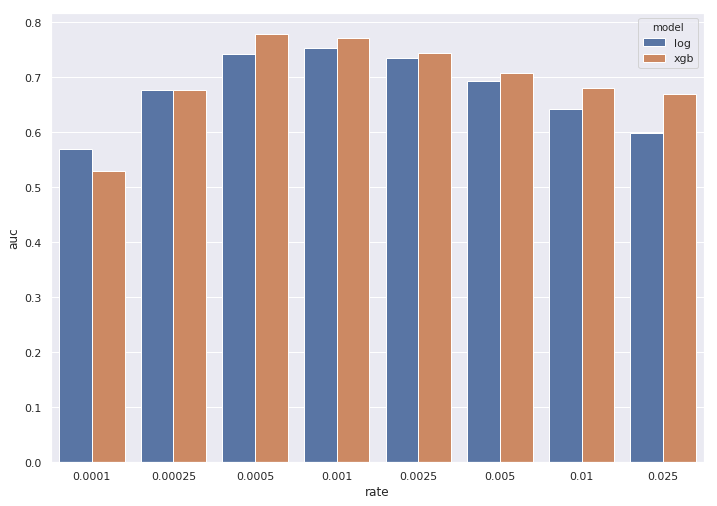

In [296]:
sns.barplot(x='rate', y='auc', hue='model', data=classifier_df)

In [45]:
# XGB gave the best score. To use XGB model for prediction
pred_df = get_est_ctr(xgbmodel, ds_val, downsample_rate)


# Linear Bidding Strategy

In [316]:
# Linear bidding strategy
# Best results: 
# linear_129: clicks: 159, imps: 138040, spent: 6250.00, ctr: 0.00115, cpm: 0.04528, cpc: 39.30817
# linear_128: clicks: 159, imps: 137414, spent: 6205.56, ctr: 0.00116, cpm: 0.04516, cpc: 39.02867
# linear_127: clicks: 159, imps: 136647, spent: 6156.00, ctr: 0.00116, cpm: 0.04505, cpc: 38.71697

avg_ctr = ds_train.click.mean()
print(f'avg_ctr: {avg_ctr}')
      
results = {}
      
for base_bid in range(70, 150, 1):
    pred_df['bidprice'] = pred_df['cctr'].apply(linear, args=(avg_ctr, base_bid))
    result = check_clicks(ds_val, pred_df)
    results[f'linear_{base_bid}'] = result
    results[f'linear_{base_bid}']['basebid'] = base_bid

avg_ctr: 0.0007375623256619447


In [322]:
# Best result to file 
base_bid = 129
pred_df['bidprice'] = pred_df['cctr'].apply(linear, args=(avg_ctr, base_bid))
pred_df[['bidid', 'bidprice']].to_csv(f'./validate/val_linear_model.csv', index=False, header=True)

In [47]:
show_result(results)

linear_129: clicks: 159, imps: 138040, spent: 6250.00, ctr: 0.00115, cpm: 0.04528, cpc: 39.30817
linear_128: clicks: 159, imps: 137414, spent: 6205.56, ctr: 0.00116, cpm: 0.04516, cpc: 39.02867
linear_127: clicks: 159, imps: 136647, spent: 6156.00, ctr: 0.00116, cpm: 0.04505, cpc: 38.71697
linear_126: clicks: 159, imps: 135889, spent: 6104.41, ctr: 0.00117, cpm: 0.04492, cpc: 38.39249
linear_125: clicks: 159, imps: 135191, spent: 6054.48, ctr: 0.00118, cpm: 0.04478, cpc: 38.07847
linear_124: clicks: 159, imps: 134340, spent: 5999.59, ctr: 0.00118, cpm: 0.04466, cpc: 37.73328
linear_123: clicks: 158, imps: 133610, spent: 5954.31, ctr: 0.00118, cpm: 0.04456, cpc: 37.68553
linear_122: clicks: 158, imps: 132846, spent: 5906.09, ctr: 0.00119, cpm: 0.04446, cpc: 37.38032
linear_130: clicks: 157, imps: 137652, spent: 6249.91, ctr: 0.00114, cpm: 0.04540, cpc: 39.80837
linear_121: clicks: 157, imps: 132074, spent: 5854.02, ctr: 0.00119, cpm: 0.04432, cpc: 37.28676


In [48]:
linear_bids_df = pd.DataFrame.from_dict(results, orient='index')

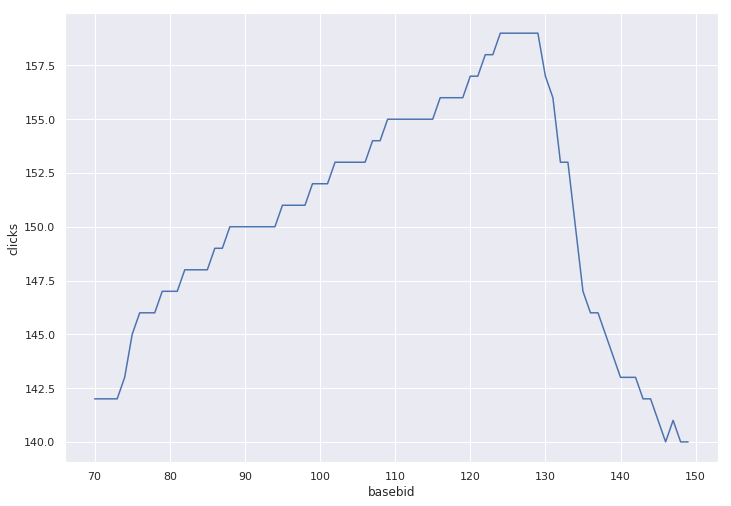

In [49]:
sns.lineplot(x='basebid', y='clicks', data=linear_bids_df, markers=True)

# Non-Linear Bidding Strategy

In [46]:
# Finding calibration for l and c value in ORTB1 equation
# Studying ranges (1e-8 to 1e-5): Best results
# 2e-06l_100c: clicks: 158, imps: 144609, spent: 6249.97, ctr: 0.00109, cpm: 0.04322, cpc: 39.55675
# 2e-06l_95c: clicks: 158, imps: 144342, spent: 6193.43, ctr: 0.00109, cpm: 0.04291, cpc: 39.19894
# 2e-06l_90c: clicks: 156, imps: 143160, spent: 6103.36, ctr: 0.00109, cpm: 0.04263, cpc: 39.12410
# 2e-06l_85c: clicks: 155, imps: 141876, spent: 6001.99, ctr: 0.00109, cpm: 0.04230, cpc: 38.72253
                            
results = {}

for c in range(10, 160, 10):
    for scale in [1e-7]:
        for l in range(100, 1000, 200):
            l = l * scale
            pred_df['bidprice'] = pred_df['cctr'].apply(ortb1, args=(l, c))
            result = check_clicks(ds_val, pred_df)
            results[f'{l}l_{c}c'] = result
            results[f'{l}l_{c}c']['c'] = c
            results[f'{l}l_{c}c']['l'] = l

NameError: name 'ortb1' is not defined

In [ ]:
print('ORTB 1 Results')
results_ortb1 = results
show_result(results_ortb1)

In [ ]:
ortb1_bids_df = pd.DataFrame.from_dict(results, orient='index', dtype=float)

In [ ]:
ortb1_bids_df.sort_values('l', ascending=False)

In [ ]:
# Finding calibration for lambda and c value in ORTB2 equation
# 3.3999999999999996e-06l_150c: clicks: 160, imps: 141861, spent: 6174.66, ctr: 0.00113, cpm: 0.04353, cpc: 38.59163
# 3e-06l_90c: clicks: 155, imps: 143269, spent: 5978.37, ctr: 0.00108, cpm: 0.04173, cpc: 38.57010
# 2.4999999999999998e-06l_70c: clicks: 152, imps: 149213, spent: 6249.97, ctr: 0.00102, cpm: 0.04189, cpc: 41.11823

results = {}

for scale in [1e-7]:
    for l in range(10, 1000, 200):
        l = l * scale
        for c in range(10, 210, 10):
            pred_df['bidprice'] = pred_df['cctr'].apply(ortb2, args=(l, c))
            result = check_clicks(ds_val, pred_df)
            results[f'{l}l_{c}c'] = result
            results[f'{l}l_{c}c']['c'] = c
            results[f'{l}l_{c}c']['l'] = l

In [ ]:
print('ORTB 2 Results')
results_ortb2 = results
show_result(results_ortb2)

# Generate Submission File 

In [145]:
models = {
    'xgb': xgbmodel,
    'log': logmodel
}

bid_strat = {
    'linear': (linear, (0.0007375623256619447, 129)), # Linear bidding 
    'ortb1':  (ortb1, (2e-06, 90)), # ORTB 1,
    'ortb2':  (ortb2, (3.4e-06, 150)), # ORTB 2,
    'const': (const, (77,)),
    'rand': (rand, (300, 350))
}

sel_model = 'xgb'
sel_strat = 'ortb2'
downsample_rate = 0.0005 # Best AUC from testing

In [435]:
import pickle
model_path = './xgb_model.sav'
pickle.dump(models['xgb'], open(model_path, 'wb'))

In [327]:
def write_bids(df, filepath, strat, downsample_rate=0.0005, model='xgb'):
    o_df = get_est_ctr(models[model], df, downsample_rate)
    o_df['bidprice'] = o_df['cctr'].apply(bid_strat[strat][0], args=bid_strat[strat][1])
    o_df['bidprice'] = o_df['bidprice'].apply(lambda x: 301 if x > 300 else x)
    o_df[['bidid', 'bidprice']].to_csv(filepath, index=False, header=True)
    print('Finish generating test_bids file')

In [315]:
write_bids(ds_val, './validate/val-bids-linear.csv', 'linear')

Finish generating test_bids file


# Problem 5 - Multi-Agent Strategy

In [458]:
# XGB gave the best score. To use XGB model for prediction
pred_df = get_est_ctr(models['xgb'], ds_val, downsample_rate)

In [106]:
players = []

for strat, args in bid_strat.items():
    pred_df['bidprice'] = pred_df['cctr'].apply(args[0], args=args[1])
    players.append((strat, pred_df[['bidprice', 'bidid']]))

In [112]:
x = pd.DataFrame.from_dict(simulate_auction(ds_val, players), orient='index')
x['ctr'] = x['click'] / x['imps']
x['cpc'] = x['cost'] / x['click']
x[['click', 'imps', 'ctr', 'cpc', 'cost', 'out_round']]

,click,imps,ctr,cpc,cost,out_round
const,7,92632,0.000076,892.863848,6250.046936,252644
linear,70,25288,0.002768,89.285817,6250.007221,160700
ortb1,51,13927,0.003662,49.091965,2503.690214,0
ortb2,30,39649,0.000757,206.489259,6194.677770,0
rand,10,43556,0.000230,625.010535,6250.105351,45513
